In [1]:
! pip install requests


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
! pip install graphviz


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
from collections import defaultdict
import re
import requests
import matplotlib.pyplot as plt
from math import log
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import graphviz
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from sklearn.tree import export_graphviz
import statsmodels.api as sm

In [4]:
#df = pd.read_csv("Contenidos_Youtube.csv")

In [5]:
#df

In [6]:
#Pasamos los datos de la url dada a un response y guardamos la informacion en un dataframe

In [7]:
url = "https://www.datos.gov.co/resource/v98q-23dp.json?$query=SELECT%0A%20%20%60titulo%60%2C%0A%20%20%60descripcion%60%2C%0A%20%20%60url_lista_de_reproduccion%60%2C%0A%20%20%60plataforma%60"
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)

In [8]:
df

,titulo,descripcion,url_lista_de_reproduccion,plataforma
0,Urbílogo - Bogotá dominguera,Entretenimiento,https://www.youtube.com/watch?v=2SNMqfo8COo,Señal Colombia
1,Historias en bici - Sibaté pedalea su pasado,Deportes,https://www.youtube.com/watch?v=ooEcRqrIyF8,Señal Deportes
2,Today in replay 18 de febrero,Deportes,https://www.youtube.com/watch?v=jzNsXnuQpDU,Señal Deportes
3,"Documentales: 'Camilo, el cura guerrillero' - ...",Película y Animación,https://www.youtube.com/watch?v=2vFrMJlP9OY,Señal Colombia
4,En cine nos vemos - Cuchillo de palo - Renate ...,Película y Animación,https://www.youtube.com/watch?v=VCtHtjphNOY,Señal Colombia
...,...,...,...,...
995,Para ver TV - Deporte,Entretenimiento,https://www.youtube.com/watch?v=yRW4EdsB8F0,Señal Colombia
996,Franja Retro - NN,Deportes,https://www.youtube.com/watch?v=I_0avV2Ql2o,Señal Colombia
997,Todo lo que vemos - 118 - Televidentes - Frank...,Educación,https://www.youtube.com/watch?v=k8aG5jcPp7w,Señal Colombia
998,sillón justicia música e identidad,Entretenimiento,https://www.youtube.com/watch?v=J0RMXGpu_BU,Señal Colombia


In [9]:
#Pasamos los titulos a una lista

In [10]:
titulos = df["titulo"].tolist()

In [11]:
#Declaramos un diccionario que contendra las palabras de los titulos

In [12]:
palabras_dict = defaultdict(int)

In [13]:
#Recorremos los titulos, quitando las mayusculas y las palabras con tilde, a la vez que contamos el numero de palabras unicas
#y que tiene el dataframe

In [14]:
for titulo in titulos:
    titulo = titulo.lower()
    titulo = re.sub('[á]', 'a', titulo)
    titulo = re.sub('[é]', 'e', titulo)
    titulo = re.sub('[í]', 'i', titulo)
    titulo = re.sub('[ó]', 'o', titulo)
    titulo = re.sub('[ú]', 'u', titulo)
    titulo = re.sub('[ñ]','n',titulo)
    palabras = titulo.split()
    for palabra in palabras:
        #print(palabra)
        palabras_dict[palabra] +=1
num_palabras_unicas = len(palabras_dict)
num_palabras_totales = sum(palabras_dict.values())

In [15]:
#Ordenamos los datos para poder hacer el grafico de barras y los limitamos a 10 para poder hacer la impresion

In [16]:
datos_ordenados = sorted(palabras_dict.items(), key=lambda x: x[1], reverse=True)

datos_limitados = dict(datos_ordenados[:10])

In [17]:
#Declaramos entonces 2 variables que contienen tanto el nombre como la cantidad de cada una de las palabras

In [18]:
palabra = list(datos_limitados.keys())
numero = list(datos_limitados.values())

In [19]:
#Se ven acontinuacion las Stopwords

<Figure size 5000x5000 with 0 Axes>

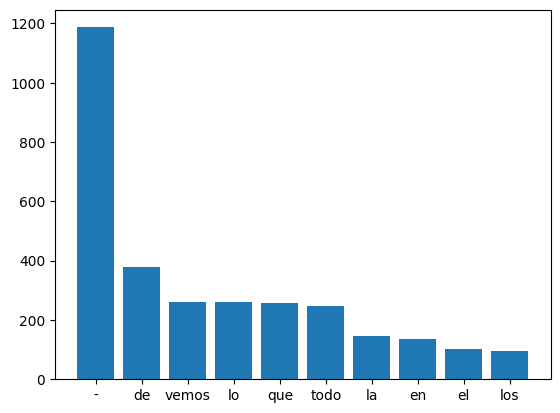

<Figure size 5000x5000 with 0 Axes>

In [20]:
plt.bar(palabra, numero)
plt.figure(figsize=(50,50))

In [21]:
#Eliminamos las stopwords del diccionario

In [22]:
eliminado = palabras_dict.pop('-')
eliminado = palabras_dict.pop('de')
eliminado = palabras_dict.pop('vemos')
eliminado = palabras_dict.pop('lo')
eliminado = palabras_dict.pop('que')
eliminado = palabras_dict.pop('todo')
eliminado = palabras_dict.pop('la')
eliminado = palabras_dict.pop('en')
eliminado = palabras_dict.pop('el')
eliminado = palabras_dict.pop('los')

In [23]:
#Empezamos con la construccion de la Matriz TF

In [24]:
#Declaramos las variables a usar y creamos un diccionario que tiene en orden las palabras de los titulos proporcinadas
#Por el diccionario anteriormente creado
lista = list(palabras_dict.keys())
matriz = []
dic = {v:k for k,v in enumerate(lista)}
for titulo_1 in titulos:
    #Quiatamos mayusculas y tiles y declaramos una variable contador que nos ayudara con el conteo de las palabras de los titulos
    cont = 0
    palabras = [0] * 2305
    titulo_1 = titulo_1.lower()
    titulo_1 = re.sub('[á]', 'a', titulo_1)
    titulo_1 = re.sub('[é]', 'e', titulo_1)
    titulo_1 = re.sub('[í]', 'i', titulo_1)
    titulo_1 = re.sub('[ó]', 'o', titulo_1)
    titulo_1 = re.sub('[ú]', 'u', titulo_1)
    titulo_1 = re.sub('[ñ]','n',titulo_1)
    aux = titulo_1.split()
    #Iteramos en lso titulso
    for palabra_1 in aux:
        #Primero se evalua si la palabra esta en el diccionario y luego se le suma a la posicion dada por el diccionario
        #Ordenado anteriormente construyendo asi la primera parte de la matriz TF
        if palabra_1 in dic:
            palabras[dic[palabra_1]] = palabras[dic[palabra_1]] + 1
        #En caso de encontrar una stop word simplemente la omitimos mediante el contador que posteriormente se usara
        if palabra_1 == '-' or palabra_1 == 'de' or palabra_1 == 'vemos' or palabra_1 == 'lo' or palabra_1 == 'que' or palabra_1=='todo' or palabra_1=='la' or palabra_1=='en' or palabra_1=='el' or palabra_1=='los':
            cont = cont + 1
    #Luego iteramos sobre palabras para hacer la respectiva division que es necesaria para terminar la matriz
    for l in range(len(palabras)):
        #Miramos que si la suma de las palabras es 0 es por que simplemente se deja en 0 el valor
        if sum(palabras) == 0:
            palabras[l] = 0
        #Luego dividimos el valor que representa la cantidad de palabras en el titulo sobre la cantidad total que esta dada por
        #la longitud menos el contador que anteriormente definimos que ayuda a no tener en cuenta las StopWords
        else:
            palabras[l] = palabras[l]*(1.0/(len(aux)-cont))
    #Ya simplemente agregamos el vector dado en la matriz creando asi la matriz TF
    matriz.append(palabras)

In [25]:
#Ejemplo del primer vector de la matriz

In [26]:
matriz[0]

[0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 

In [27]:
#Posteriormente seguimos con la creacion de la IDF

In [28]:
#Repetimos el mismo proceso inicial de la TF
dictAux = defaultdict(int)
for titulo_aux in titulos:
    aux = defaultdict(int)
    titulo_aux = titulo_aux.lower()
    titulo_aux = re.sub('[á]', 'a', titulo_aux)
    titulo_aux = re.sub('[é]', 'e', titulo_aux)
    titulo_aux = re.sub('[í]', 'i', titulo_aux)
    titulo_aux = re.sub('[ó]', 'o', titulo_aux)
    titulo_aux = re.sub('[ú]', 'u', titulo_aux)
    palabras_aux = titulo_aux.split()
    #Se consiguen los valores necesarios para la creacion de la IDF
    for h in palabras_aux:
        if h != '-' and h!='de' and h!='vemos' and h!='lo' and h!='de' and h!='que' and h!='todo' and h!='la'and h!='en' and h!='el' and h!='los':
            if h not in aux:
                aux[h] +=1
            dictAux[h] = dictAux[h] + aux[h]
#Declaramos seguidamente un vector que contiene los valores con el fin de hacerle la transoformacion del logaritmo
vector = []
for valor in dictAux.values():
    vector.append(valor)

#Declaramos entonces la IDF con la longitud del vector anterior e iteramos para realizar el logaritmo en los valores dados
IDF = [0] * len(vector)
for x in range(len(vector)):
    IDF[x] = log((1000)/(vector[x]+1))
    


In [29]:
#IDF encontrada

In [30]:
IDF

[5.521460917862246,
 5.298317366548036,
 6.214608098422191,
 4.710530701645918,
 4.710530701645918,
 6.214608098422191,
 6.214608098422191,
 4.710530701645918,
 6.214608098422191,
 3.2188758248682006,
 3.2188758248682006,
 3.2188758248682006,
 5.298317366548036,
 4.268697949366879,
 6.214608098422191,
 6.214608098422191,
 6.214608098422191,
 6.214608098422191,
 4.605170185988092,
 4.961845129926823,
 4.3428059215206005,
 4.422848629194137,
 4.268697949366879,
 3.2188758248682006,
 4.8283137373023015,
 2.9374633654300153,
 3.170085660698769,
 6.214608098422191,
 6.214608098422191,
 6.214608098422191,
 6.214608098422191,
 5.521460917862246,
 3.8632328412587142,
 3.7722610630529876,
 6.214608098422191,
 6.214608098422191,
 5.809142990314028,
 3.611918412977808,
 5.115995809754082,
 5.809142990314028,
 5.115995809754082,
 5.809142990314028,
 2.6036901857779675,
 4.710530701645918,
 6.214608098422191,
 6.214608098422191,
 6.214608098422191,
 6.214608098422191,
 4.961845129926823,
 4.9618451

In [31]:
#Ya simplemente realizamos el proceso final que es multiplicar la TF con la IDF

In [32]:
tf_idf = []
#Simplemente lo que hacemos es hacer un vector auxiliar iterar en la matriz y multiplicar cada valor de este por cada uno de
#la matriz IDF consiguiendo asi la matriz que se definio como la TF_IDF
for vector_aux in matriz:
    aux_1 = [0]*2277
    for n in range(2277):
        aux_1[n] = vector_aux[n]*IDF[n]
    tf_idf.append(aux_1)

In [33]:
#Aqui un ejemplo del resultado

In [34]:
tf_idf[1]

[0.0,
 0.0,
 0.0,
 0.7850884502743196,
 0.7850884502743196,
 1.0357680164036984,
 1.0357680164036984,
 0.7850884502743196,
 1.0357680164036984,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [35]:
#Transformamos la matriz en un dataframe

In [36]:
dataFrame = pd.DataFrame(tf_idf)

In [37]:
dataFrame

,0,1,2,3,4,5,6,7,8,9,...,2267,2268,2269,2270,2271,2272,2273,2274,2275,2276
0,1.840487,1.766106,2.071536,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.000000,0.000000,0.785088,0.785088,1.035768,1.035768,0.785088,1.035768,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.643775,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.071536,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.553652,1.553652,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.242922,1.242922,0.000000,0.000000,0.000000,0.000000,0.0


In [38]:
#Declaramos que la variable objetivo es descripcion

In [39]:
y = df['descripcion']

In [40]:
#Y dividimos en test y train

In [41]:
x_train, x_test, y_train, y_test = train_test_split(dataFrame, y, train_size = 0.8, random_state = 0)

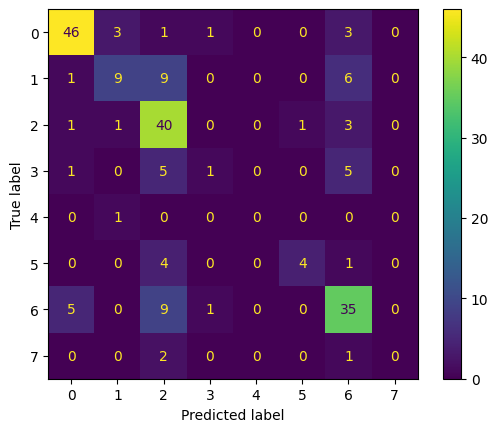

In [42]:
#Aplicamos la regresion logistica con una libreria mediante los datos de training
clf1 = LogisticRegression(solver='lbfgs').fit(x_train, y_train)
clf1.coef_
#Y creamos una matriz de confusion para ver los resultados de la regresion logistica
cm = confusion_matrix(y_test, clf1.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot()

In [43]:
#Posteriormente Imprimimos las metricas de evaluacion solicitadas(accuracy, presicion y recall)

In [44]:
y_predict=clf1.predict(x_test)
print(metrics.classification_report(y_test,y_predict, digits = 4))

                      precision    recall  f1-score   support

            Deportes     0.8519    0.8519    0.8519        54
           Educación     0.6429    0.3600    0.4615        25
     Entretenimiento     0.5714    0.8696    0.6897        46
       Gente y Blogs     0.3333    0.0833    0.1333        12
 Mascotas y Animales     0.0000    0.0000    0.0000         1
              Música     0.8000    0.4444    0.5714         9
Película y Animación     0.6481    0.7000    0.6731        50
    Viajes y Eventos     0.0000    0.0000    0.0000         3

            accuracy                         0.6750       200
           macro avg     0.4810    0.4136    0.4226       200
        weighted avg     0.6598    0.6750    0.6483       200



C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [45]:
#Continuamos entonces con la creacion del arbol GBM

In [46]:
#Creamos la primera parte del arbol con los datos de train
#Y los declaramos en unas variables auxiliares que nos permitiran definir directamente los features names
X = x_train
y = y_train
clf = tree.DecisionTreeClassifier(random_state=0,criterion='entropy')
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [47]:
#Luego simplemente graficamos el arbol donde los features name son los datos de las columnas de x_train

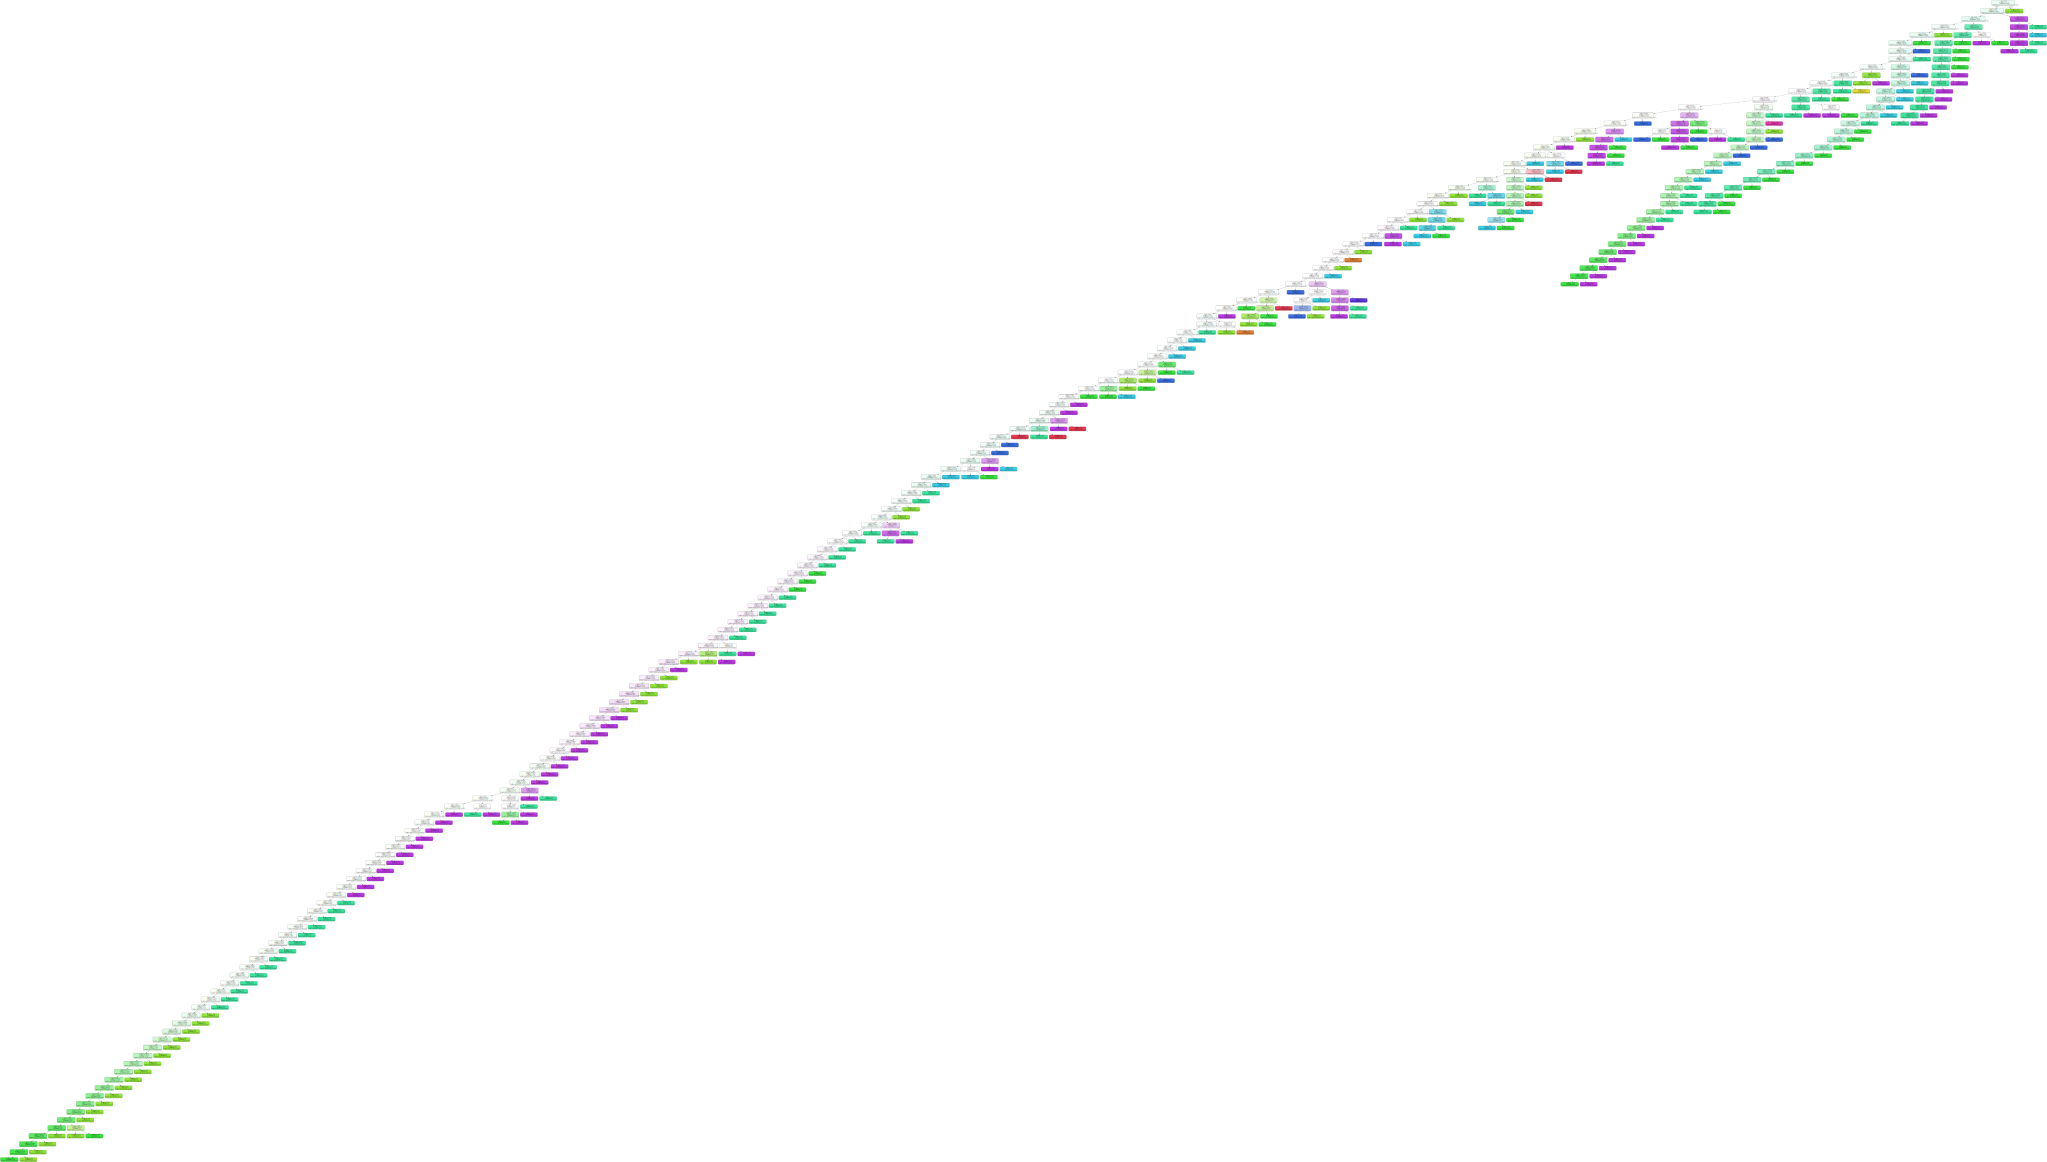

In [48]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [49]:
#Creamos la matriz de confusion que nos permite ver los resultados del arbol

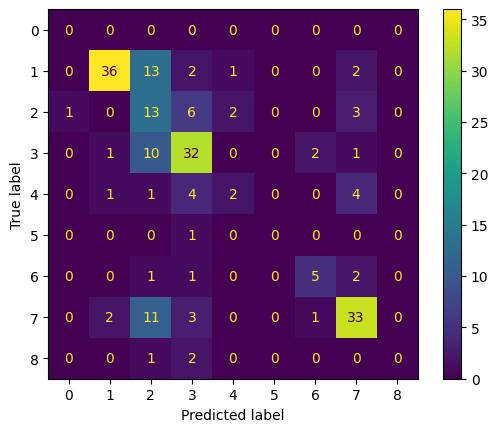

In [50]:
y_predict= clf.predict(x_test)
cm = confusion_matrix(y_test, clf.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             )
disp.plot()

In [51]:
#Luego imprimimos los resultados de las metricas

In [52]:
print(metrics.classification_report(y_test,y_predict, digits = 4))

                      precision    recall  f1-score   support

Ciencia y Tecnología     0.0000    0.0000    0.0000         0
            Deportes     0.9000    0.6667    0.7660        54
           Educación     0.2600    0.5200    0.3467        25
     Entretenimiento     0.6275    0.6957    0.6598        46
       Gente y Blogs     0.4000    0.1667    0.2353        12
 Mascotas y Animales     0.0000    0.0000    0.0000         1
              Música     0.6250    0.5556    0.5882         9
Película y Animación     0.7333    0.6600    0.6947        50
    Viajes y Eventos     0.0000    0.0000    0.0000         3

            accuracy                         0.6050       200
           macro avg     0.3940    0.3627    0.3656       200
        weighted avg     0.6553    0.6050    0.6162       200



C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [53]:
#Continuamos con Random Forest creandolo con su libreria, y segun se investigo sobre los estimadores un buen valor
#por defecto suele ser 100

In [61]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X, y)

RandomForestClassifier()

In [62]:
#Se imprimen los arboles dados

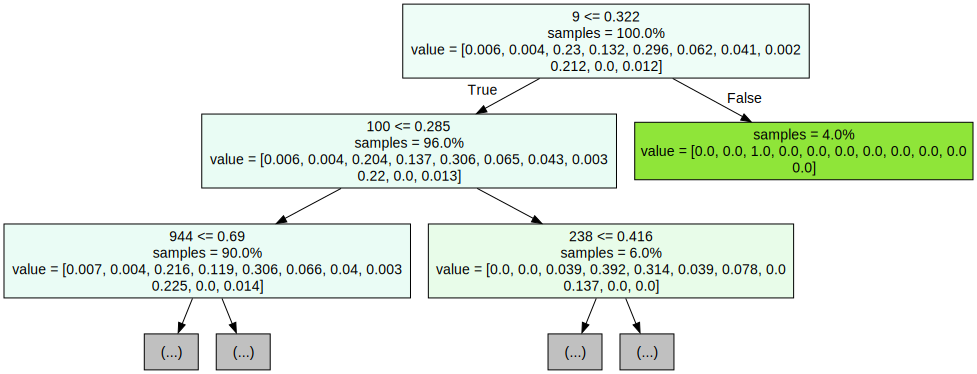

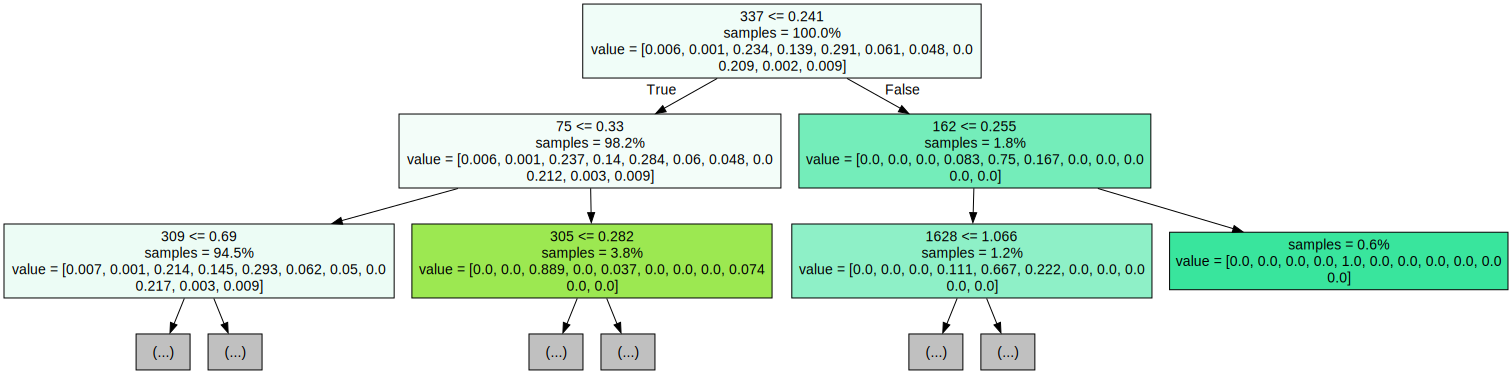

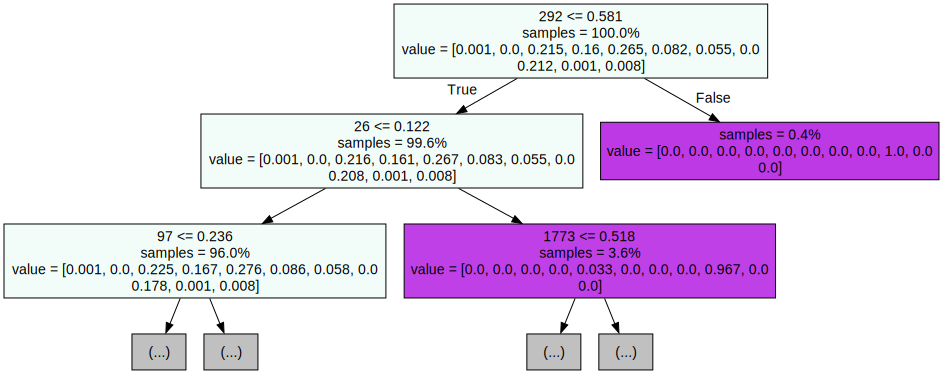

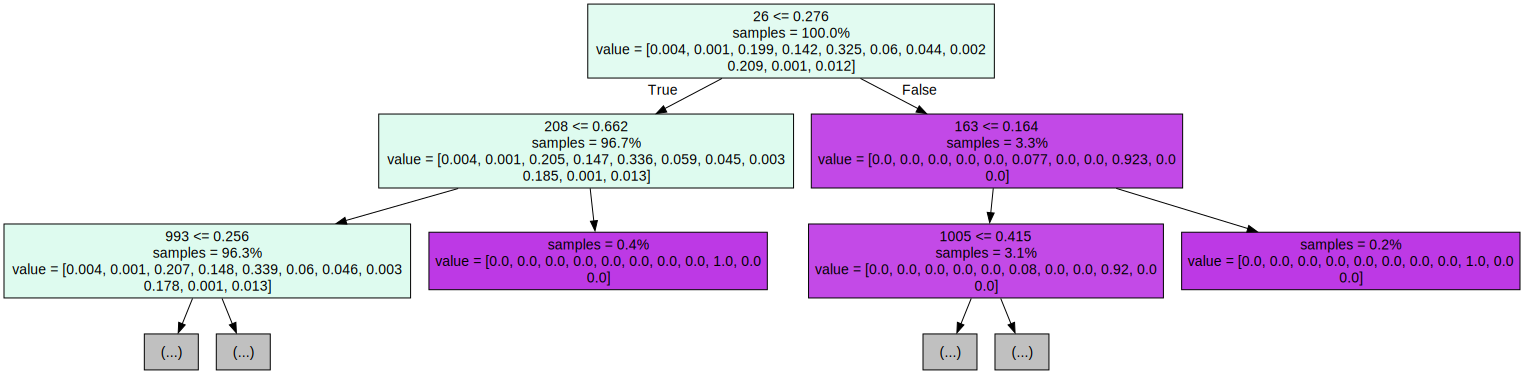

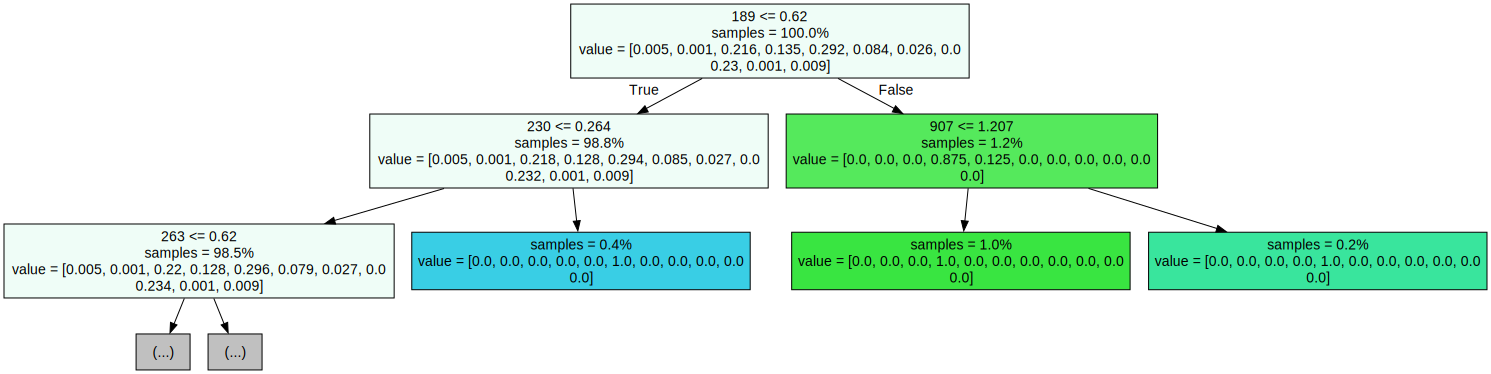

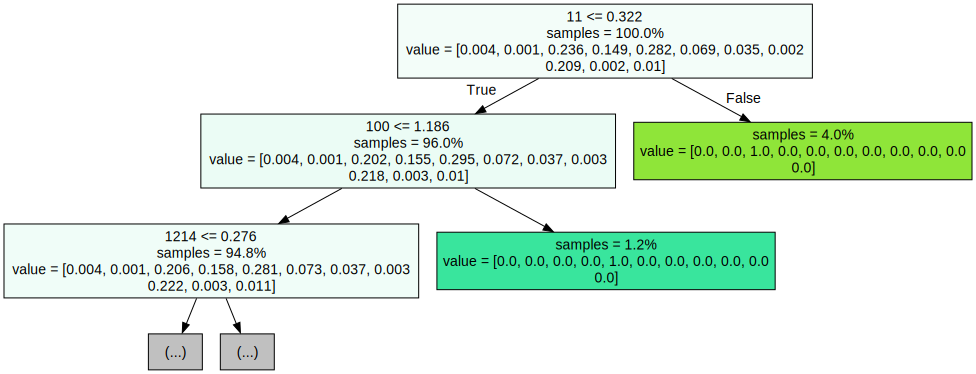

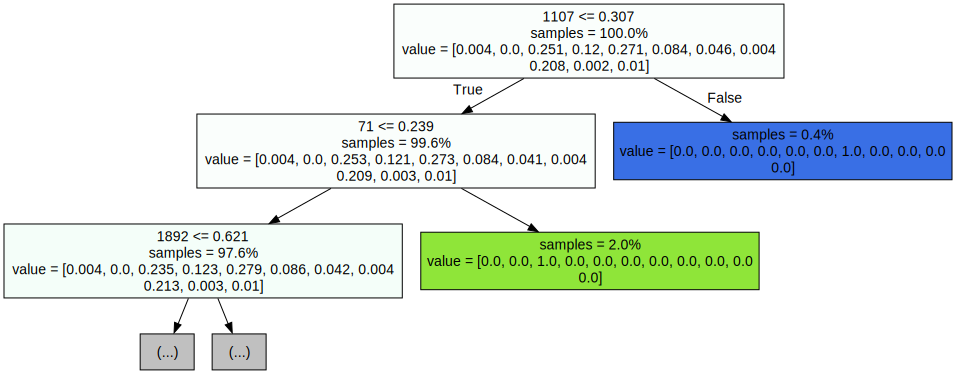

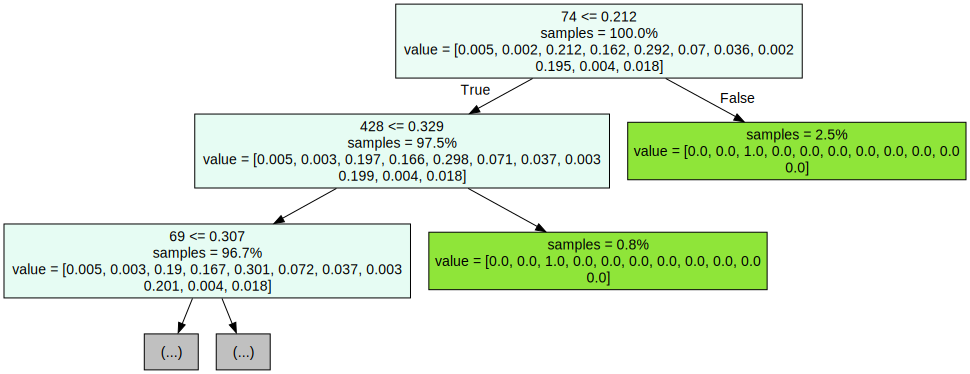

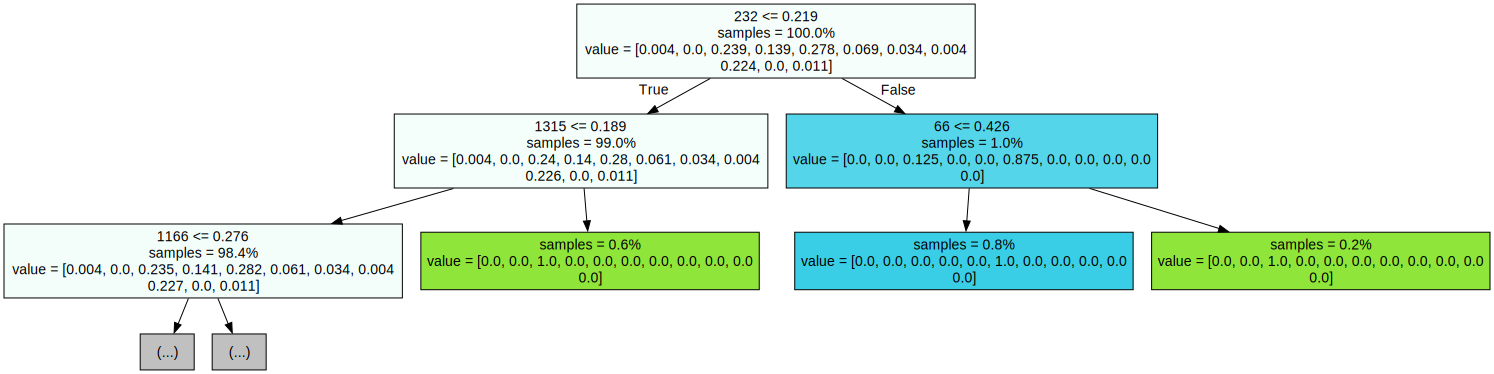

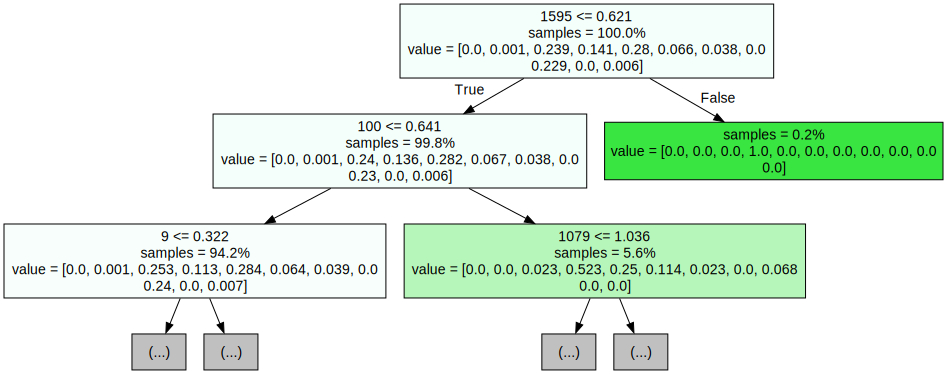

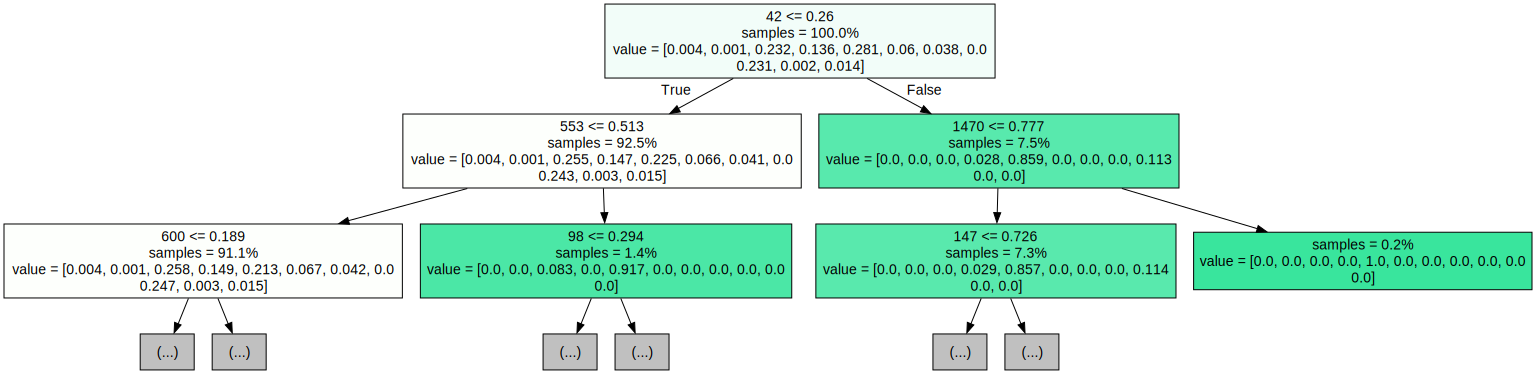

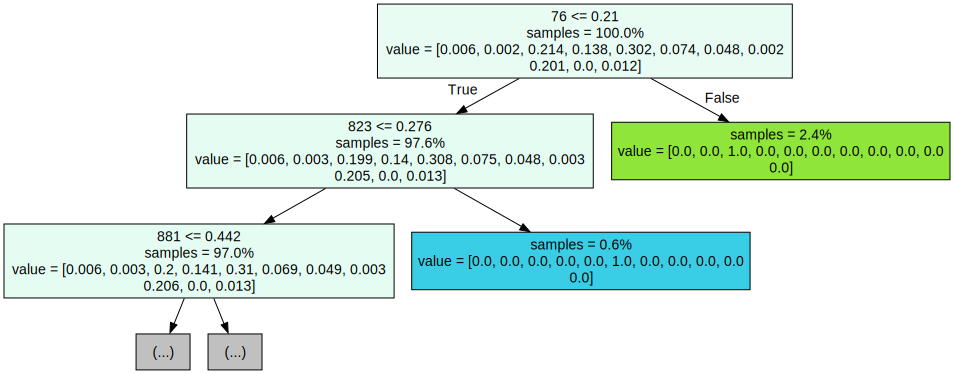

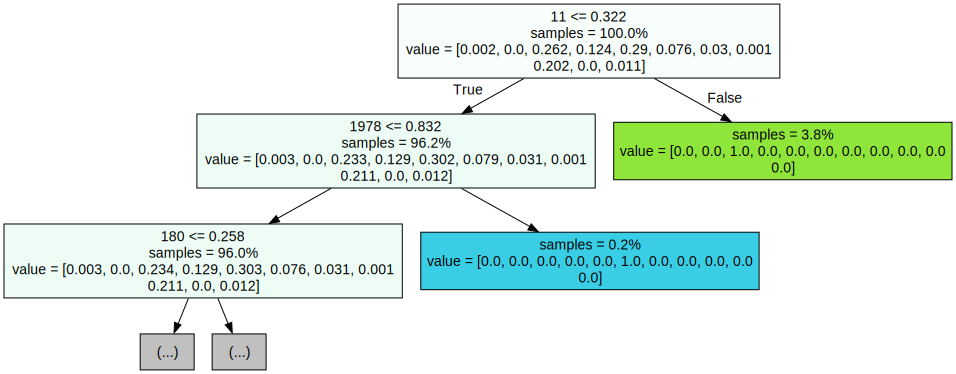

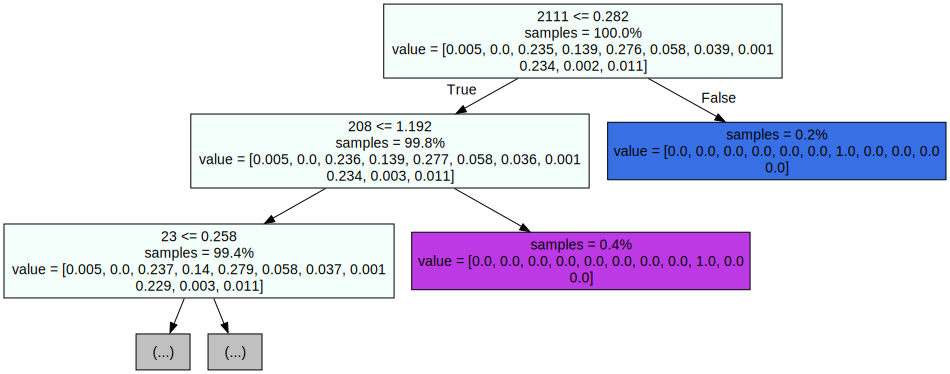

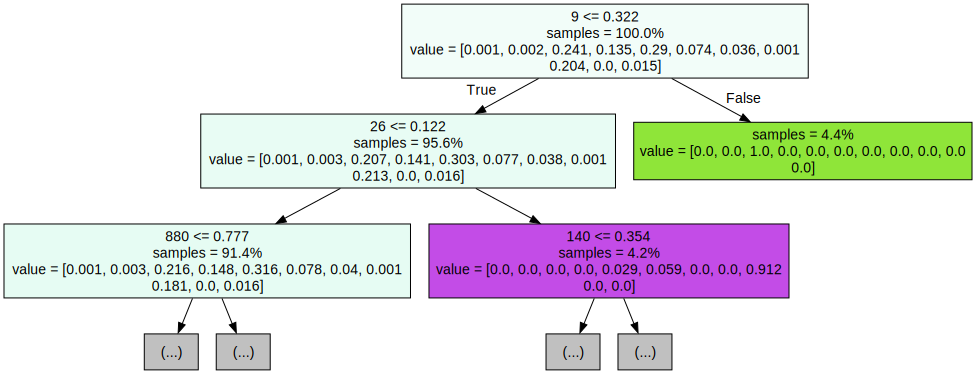

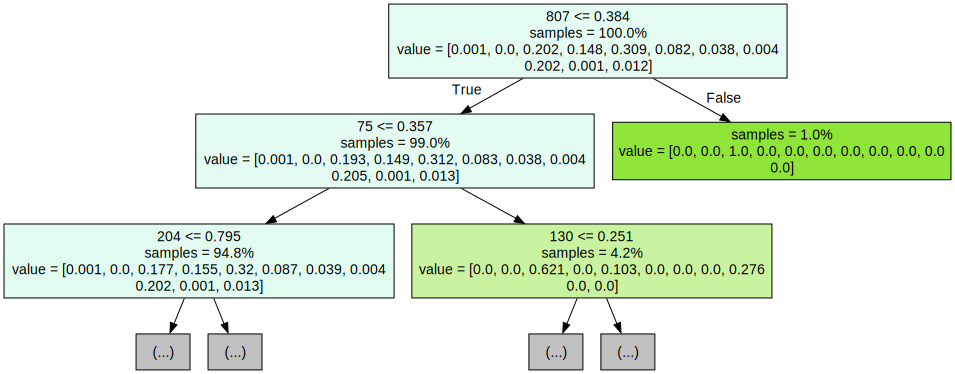

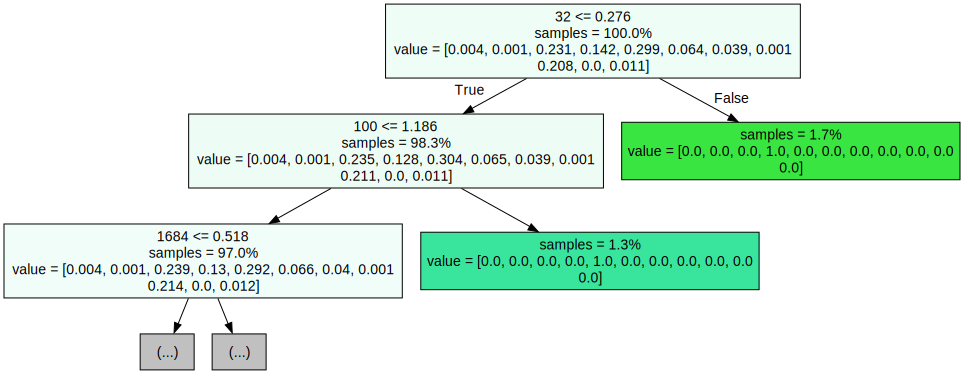

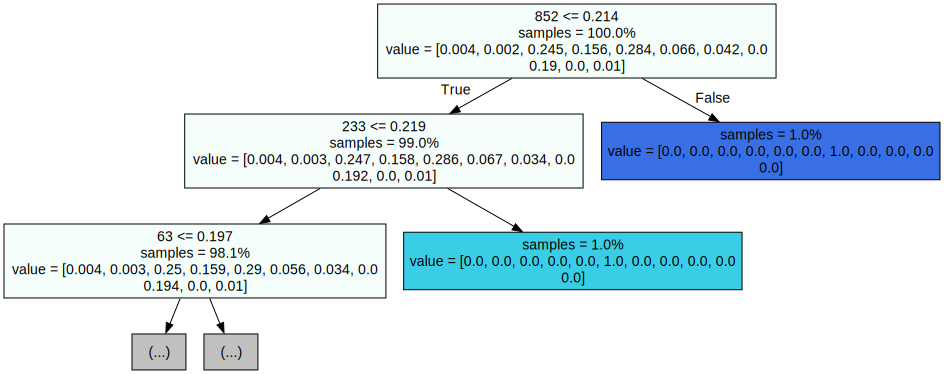

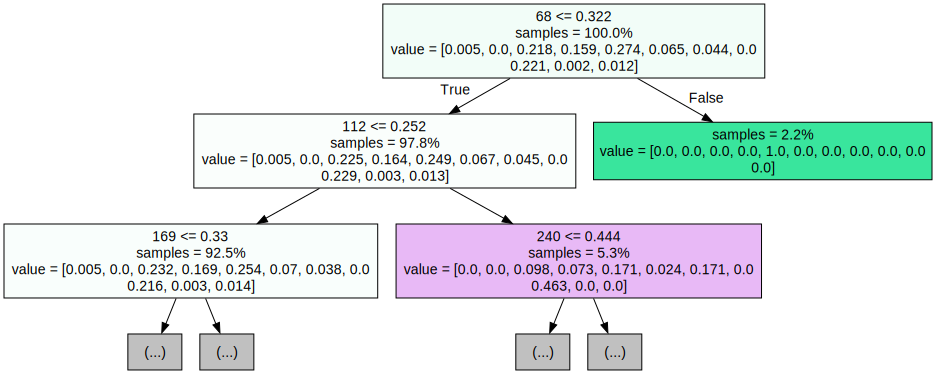

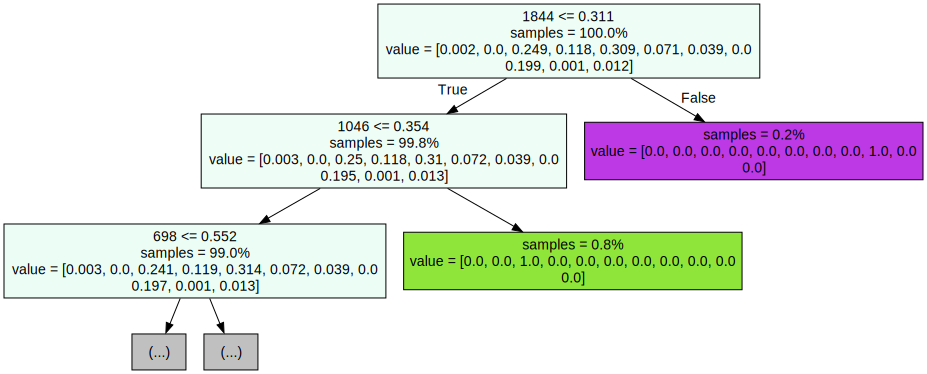

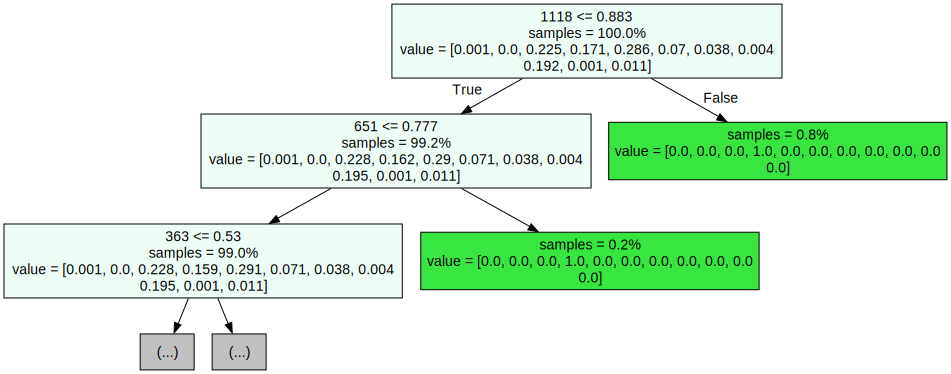

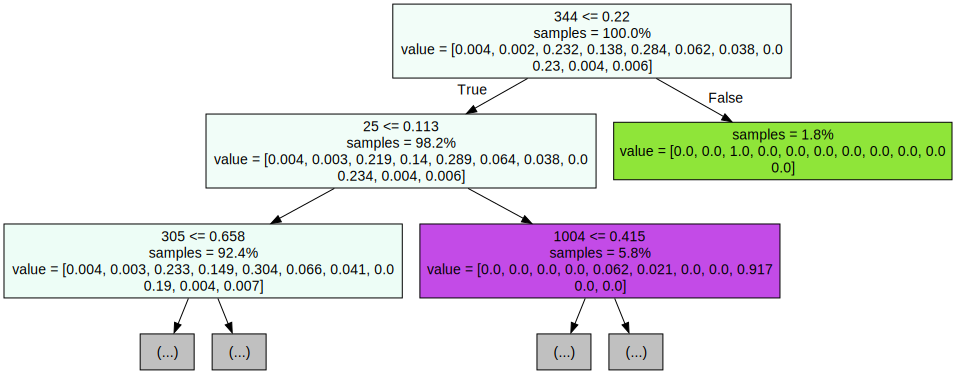

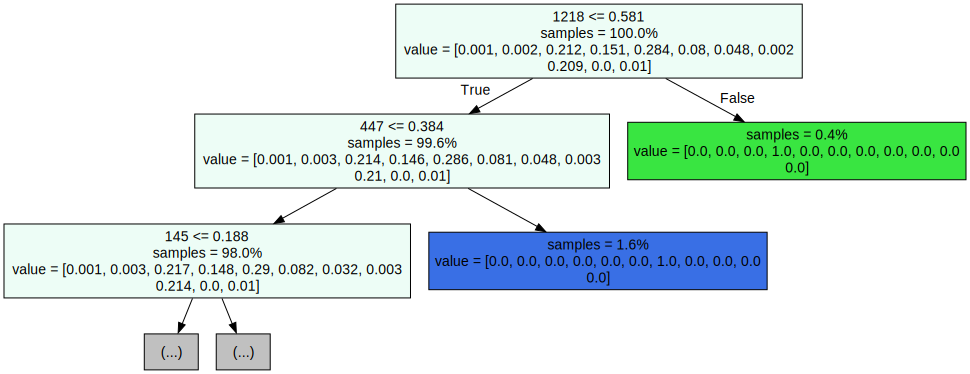

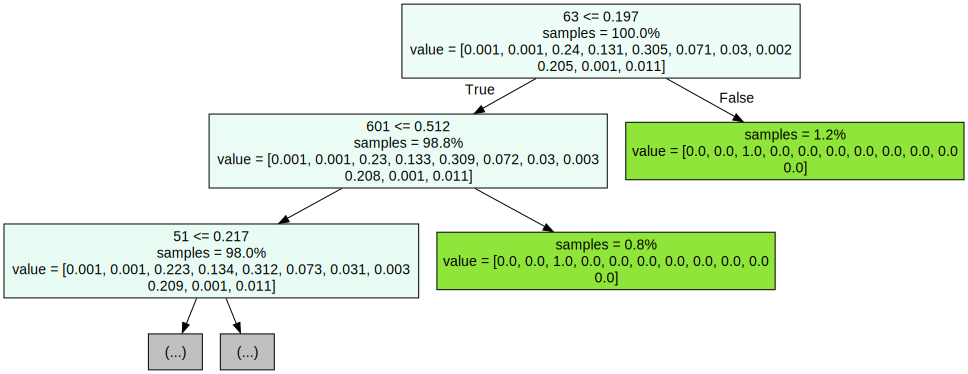

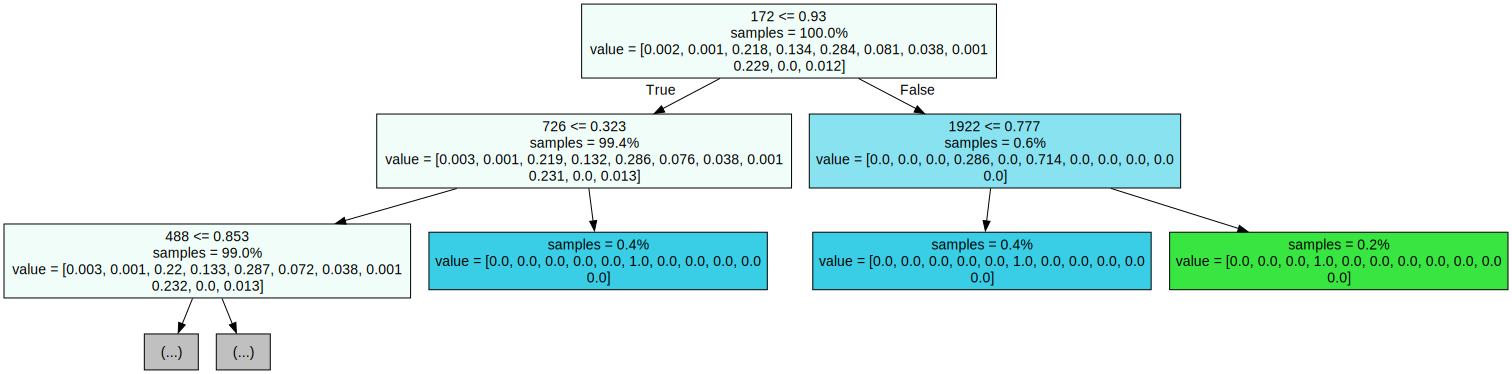

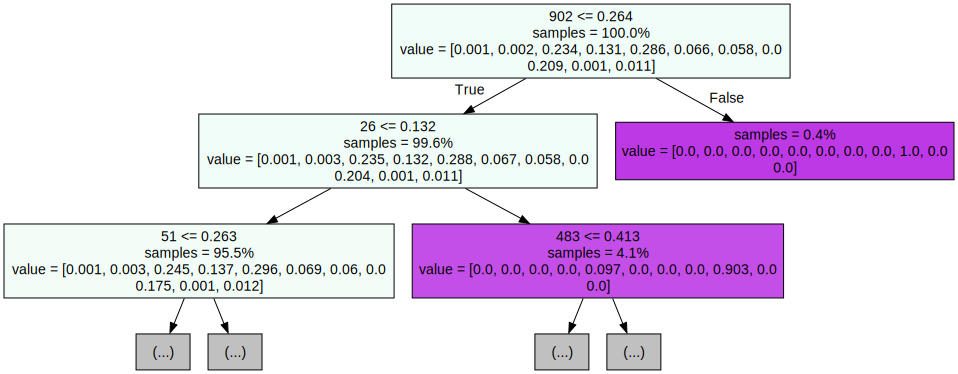

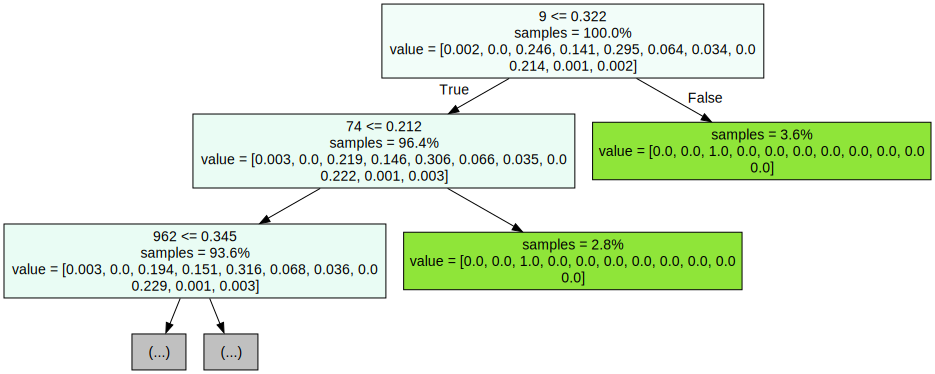

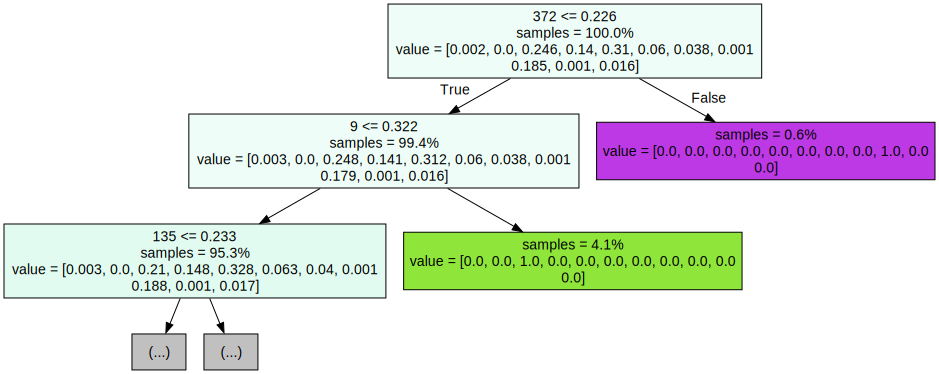

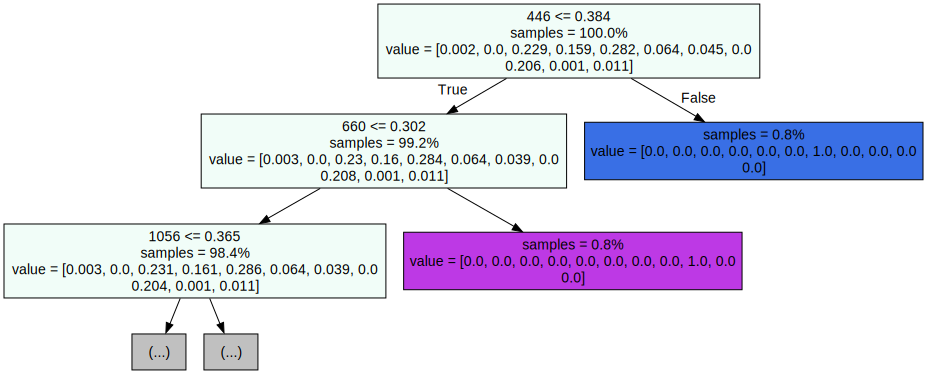

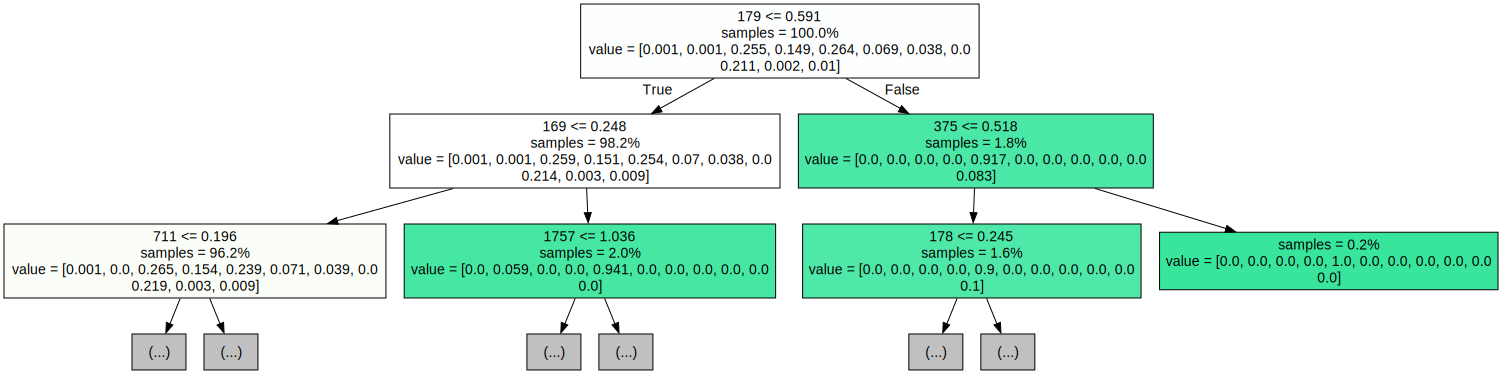

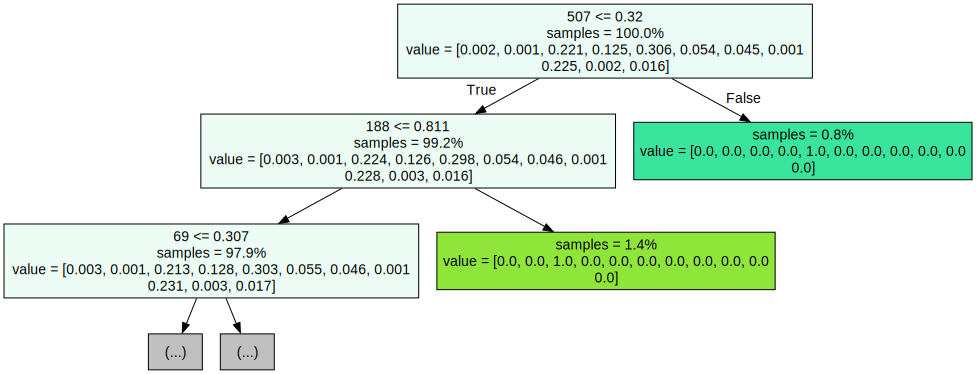

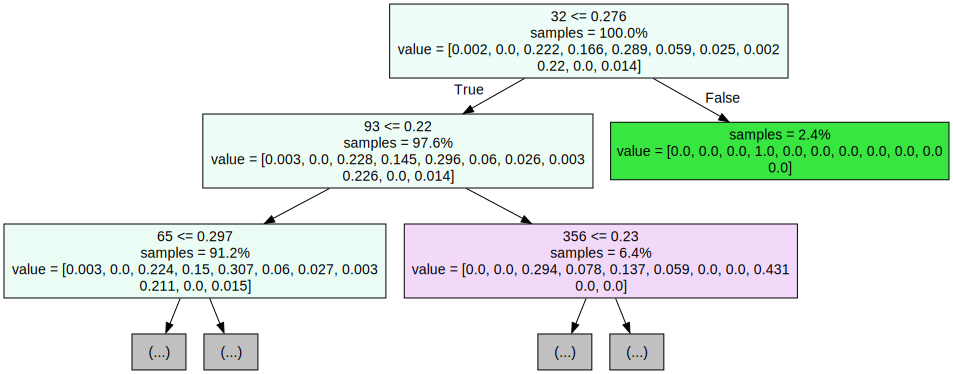

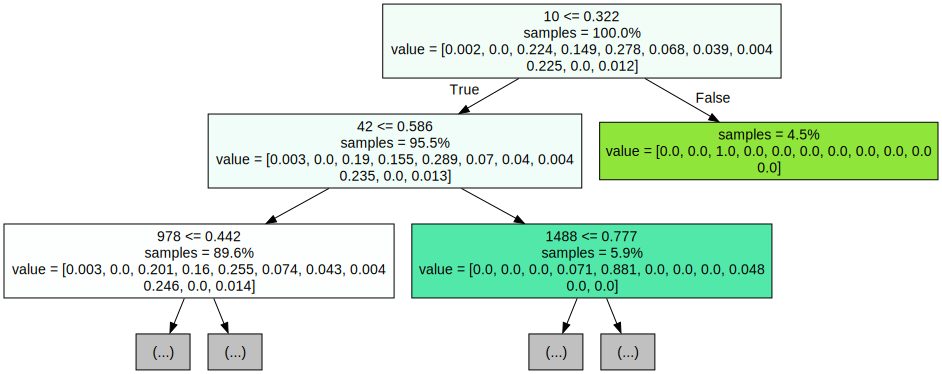

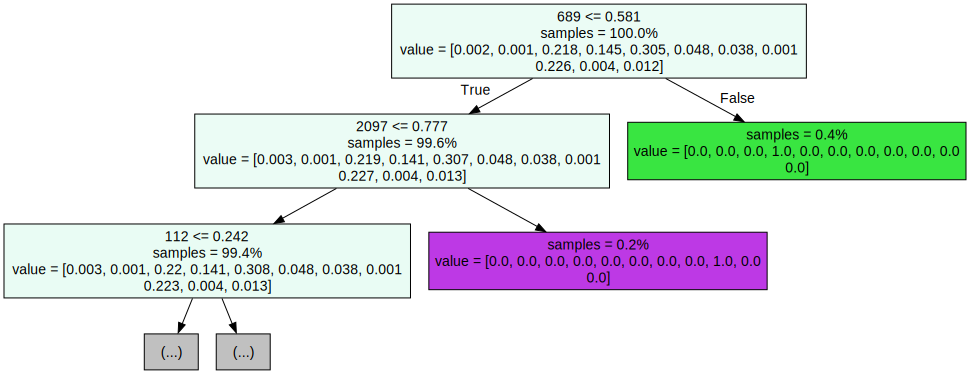

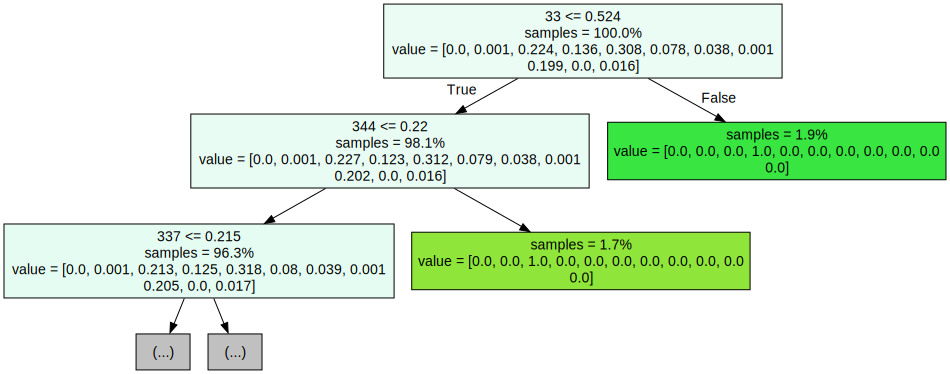

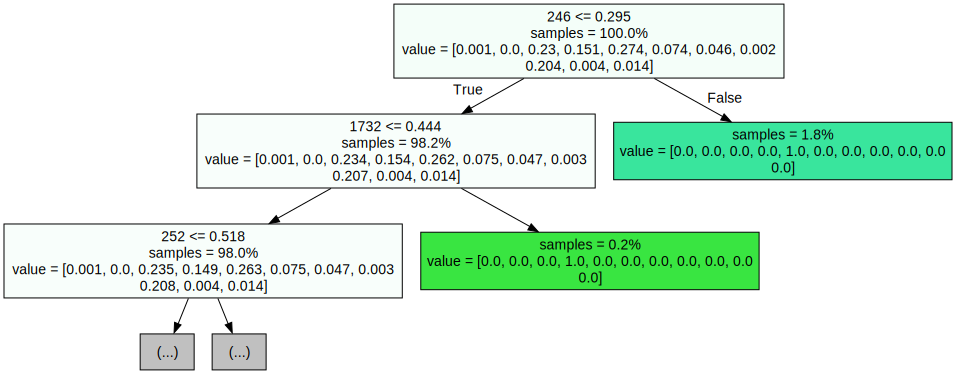

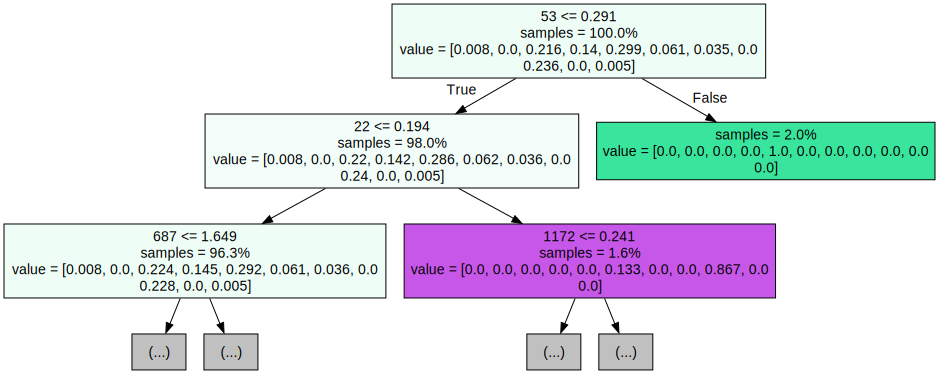

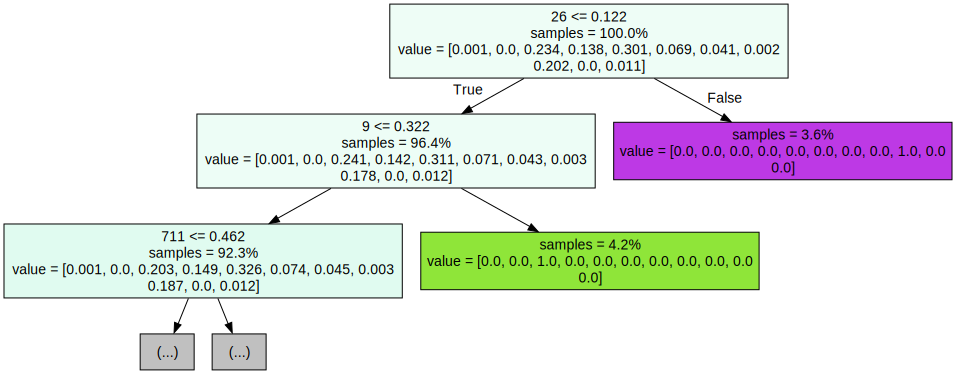

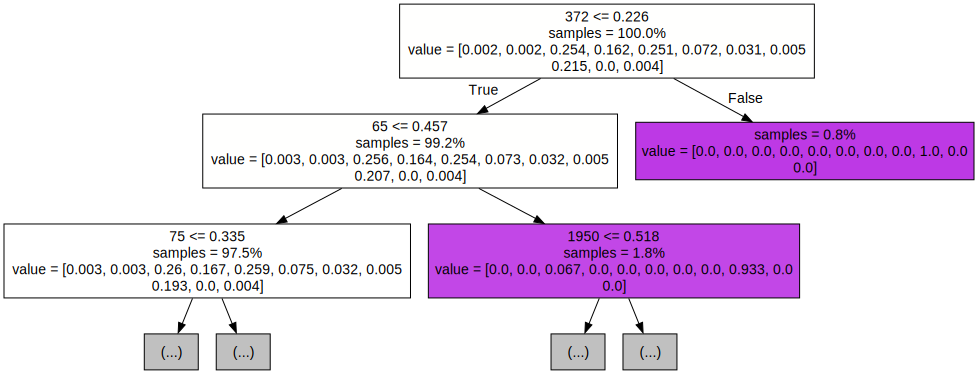

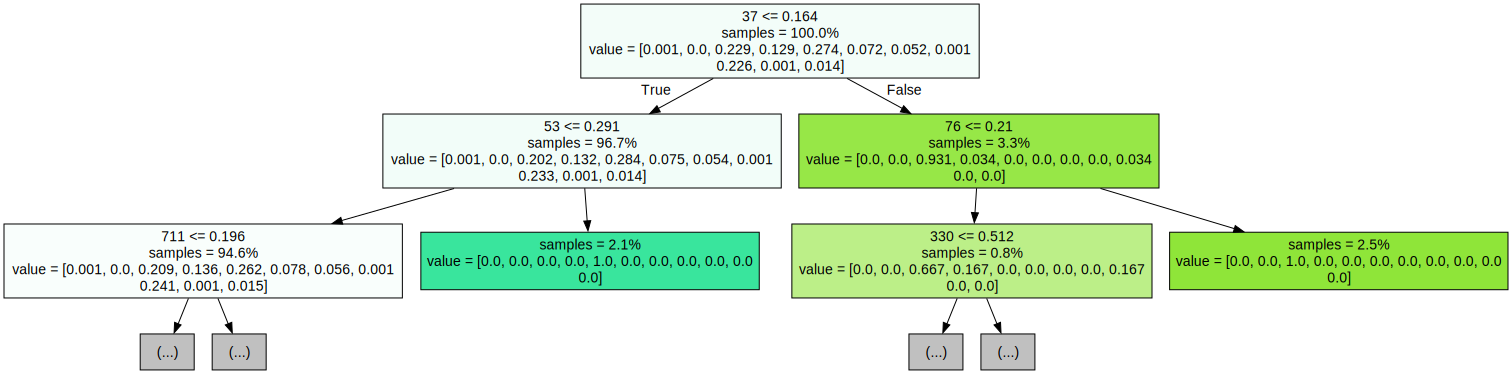

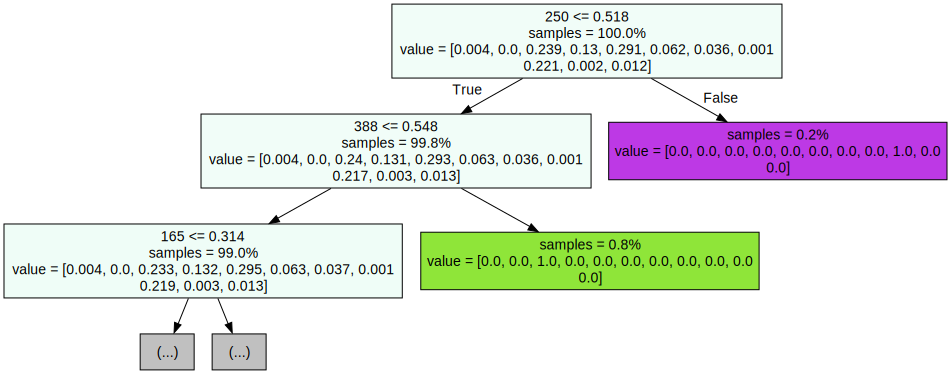

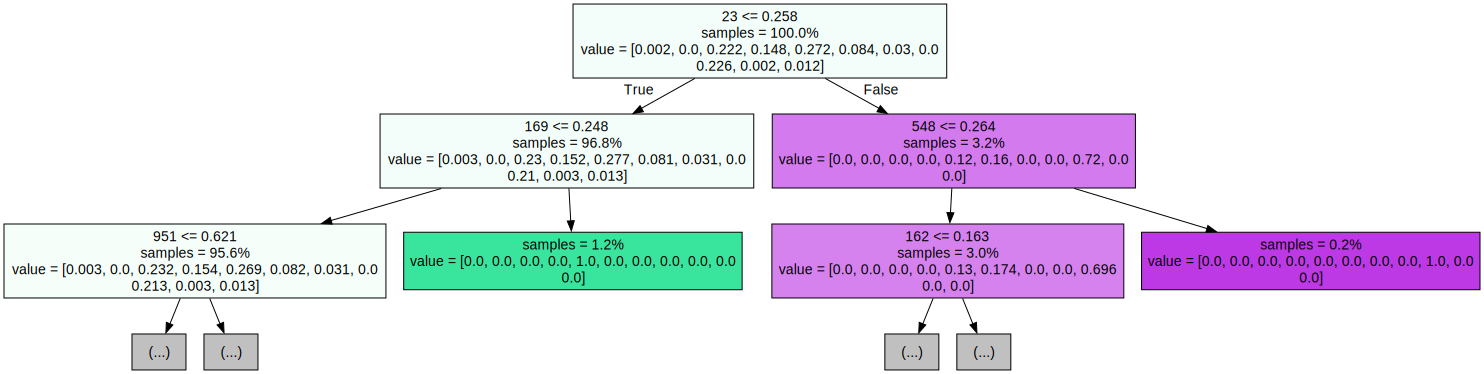

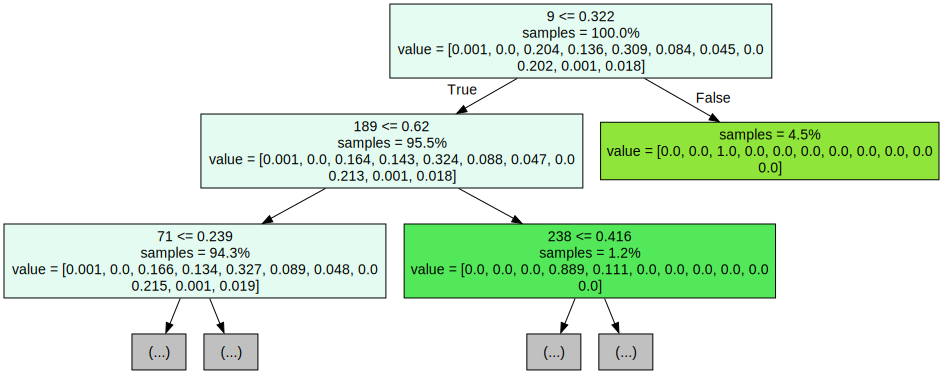

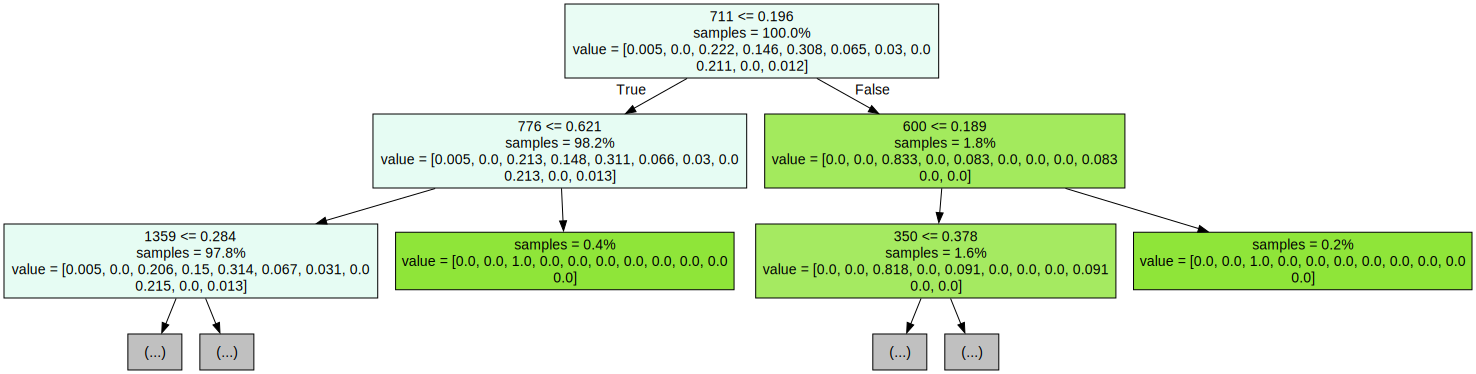

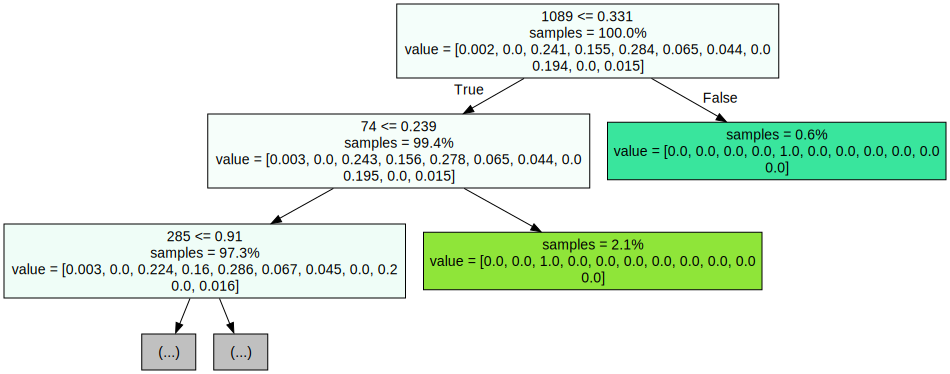

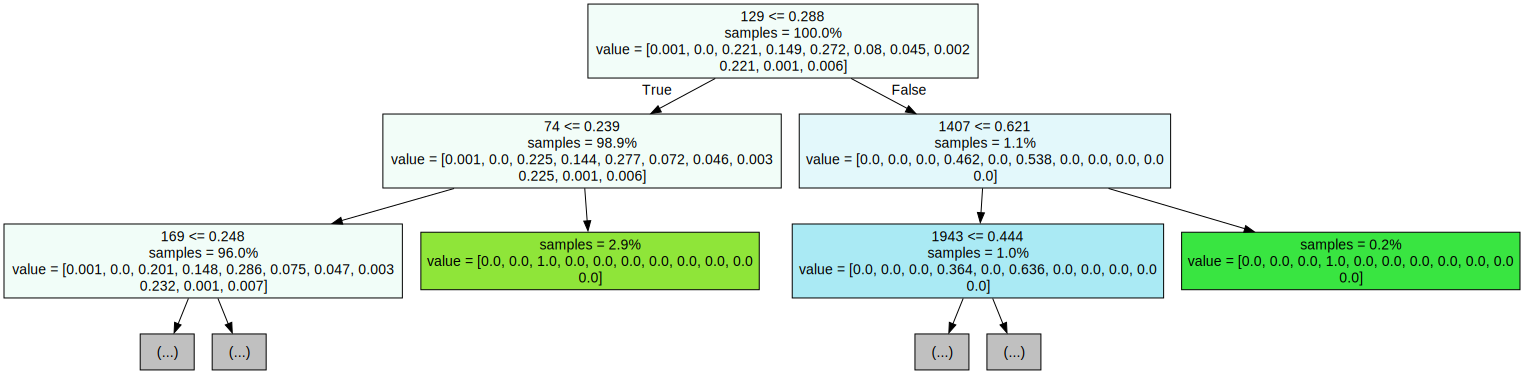

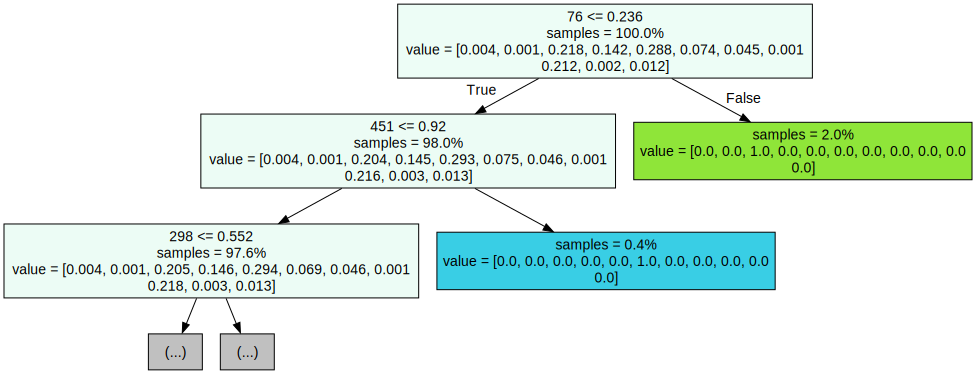

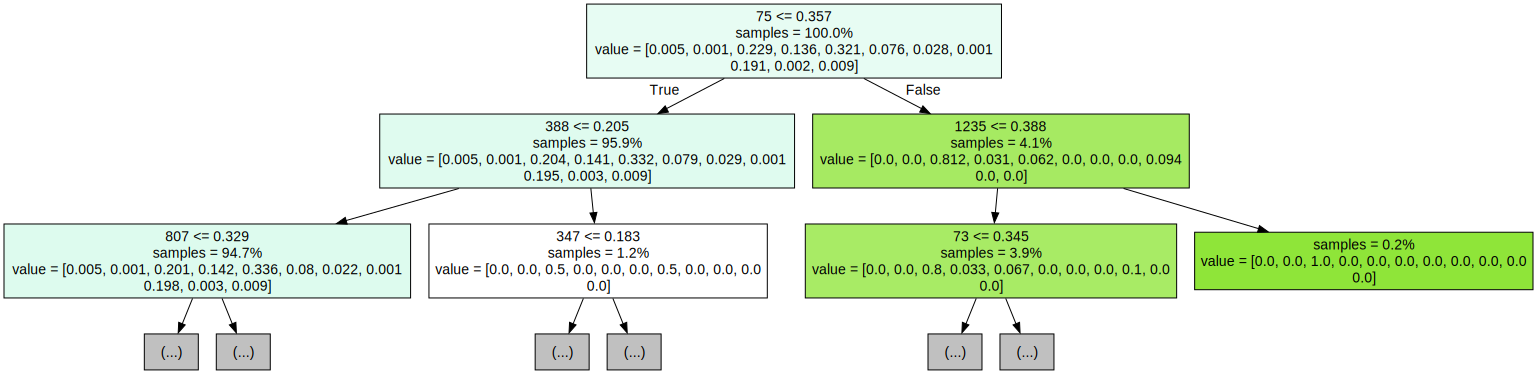

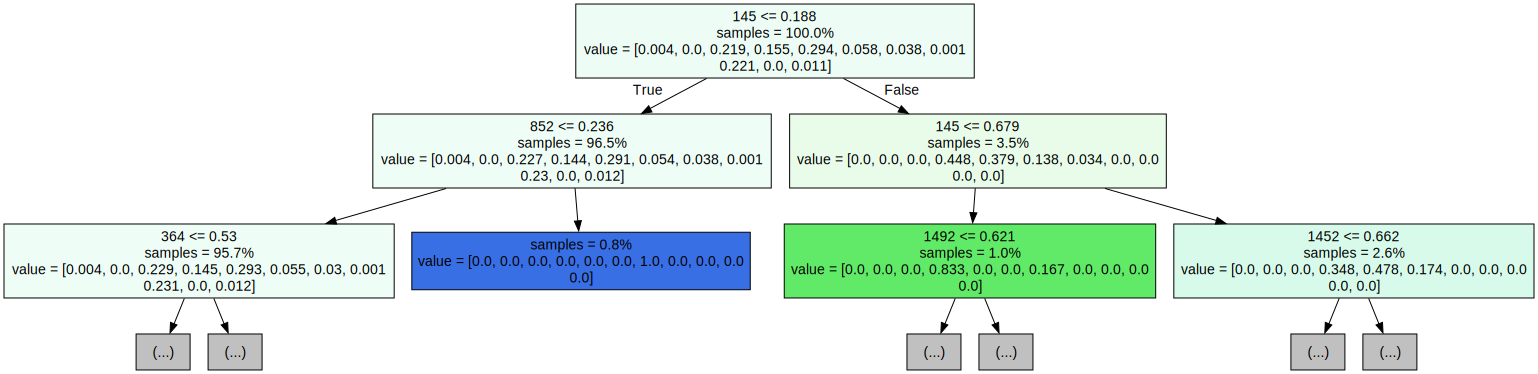

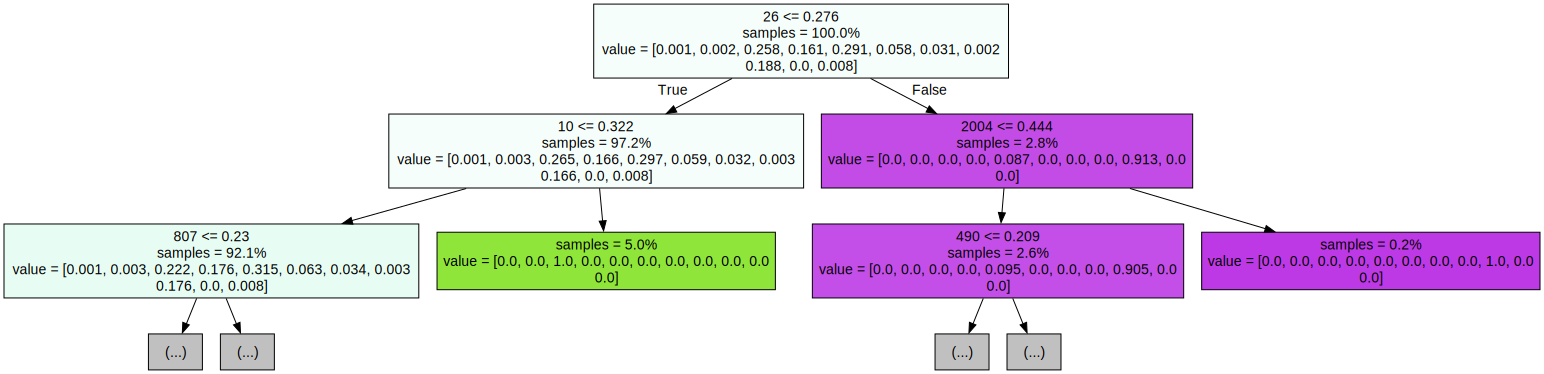

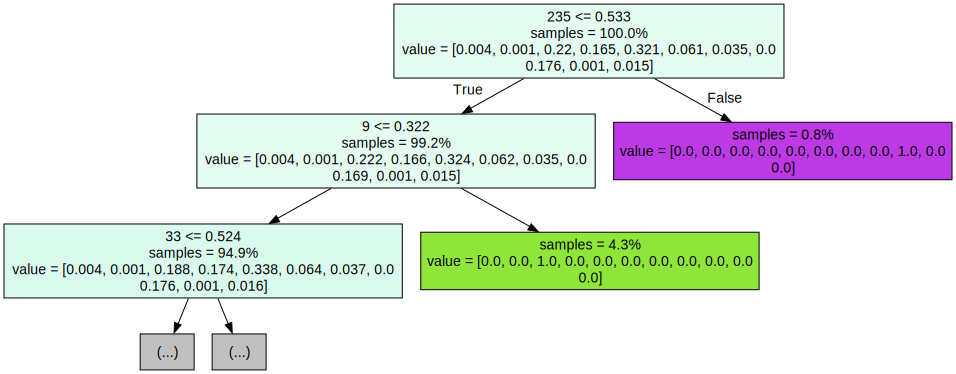

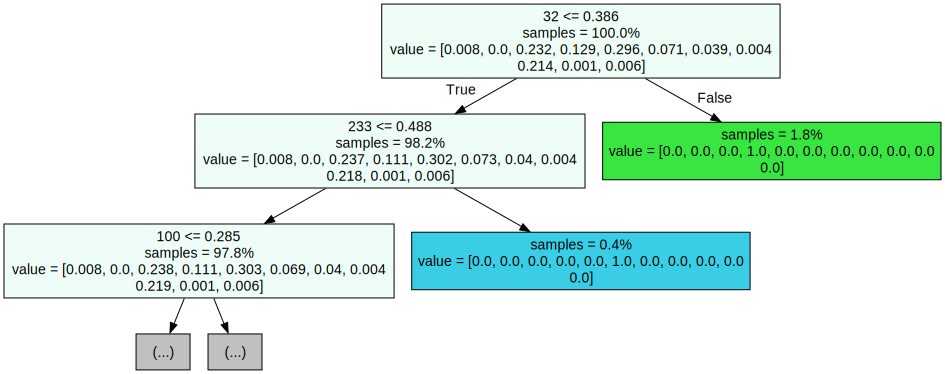

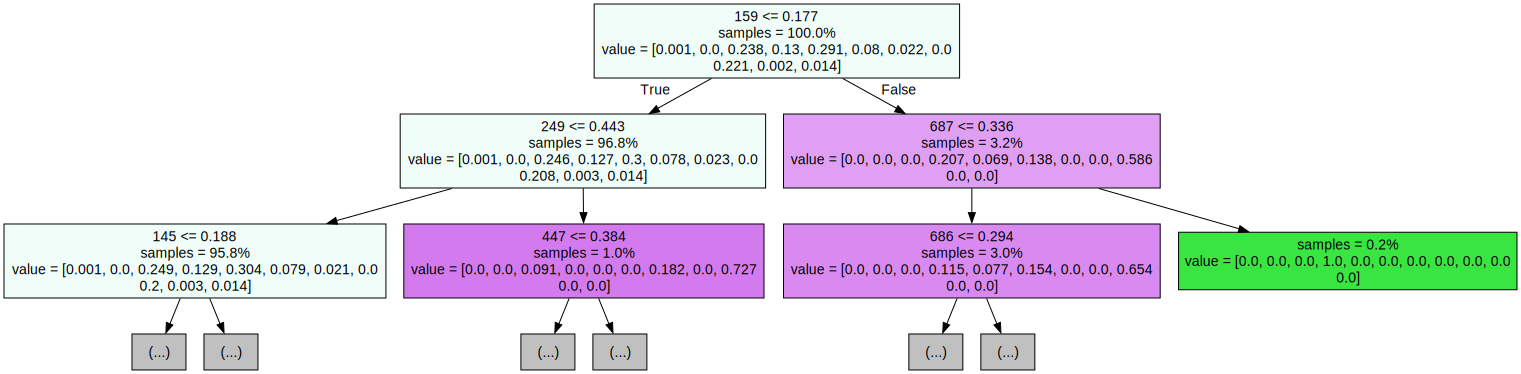

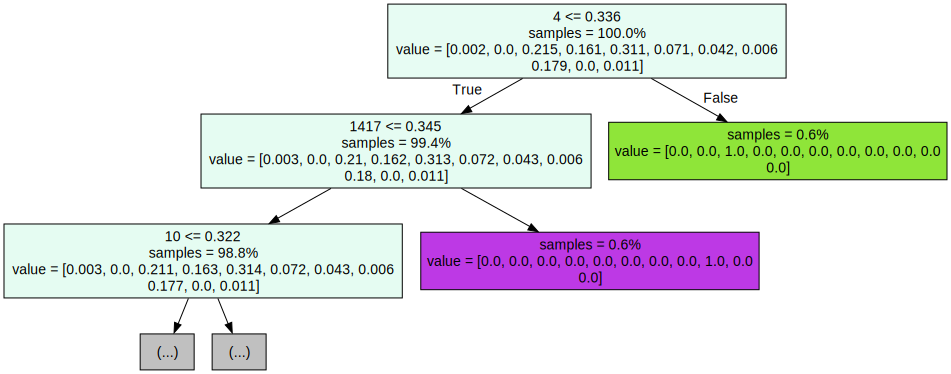

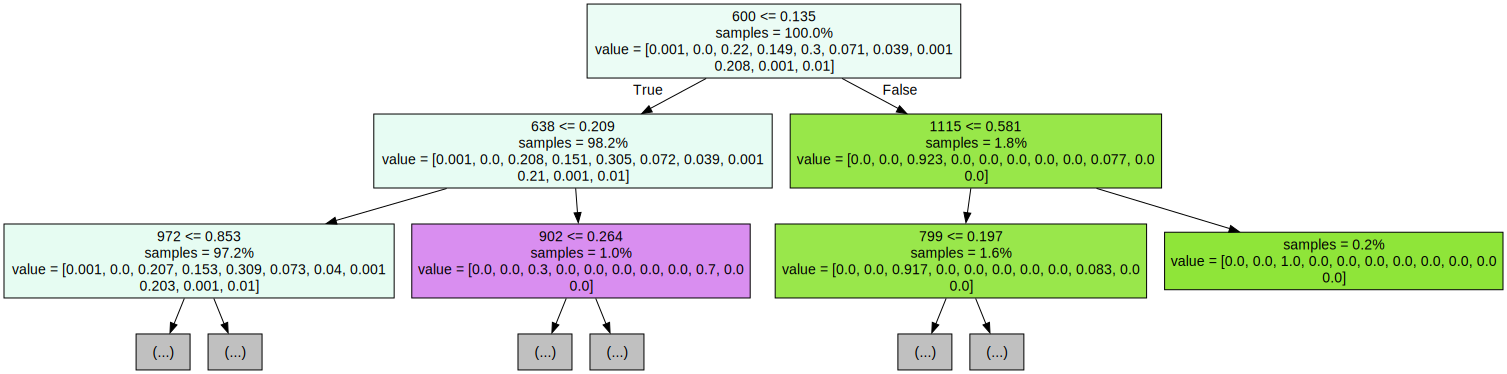

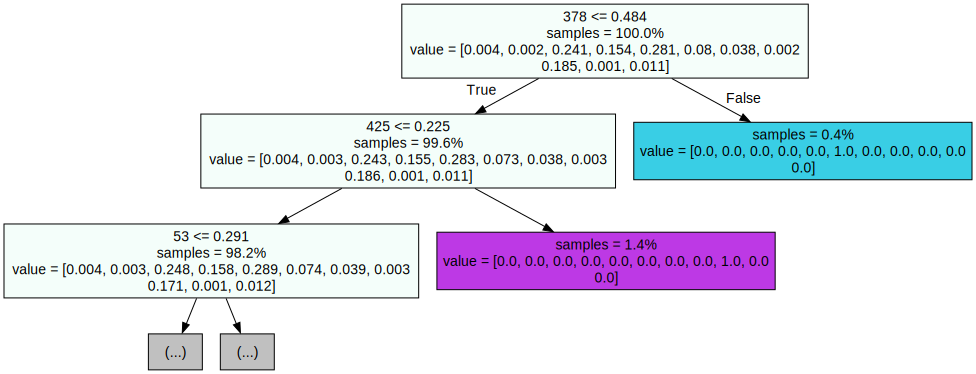

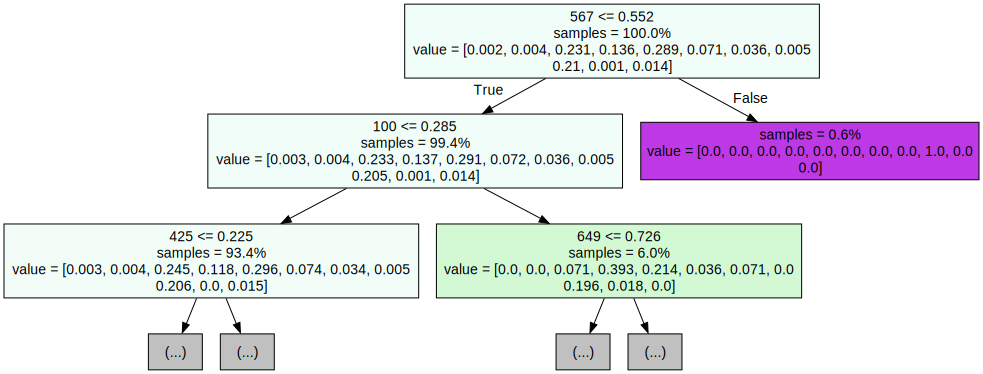

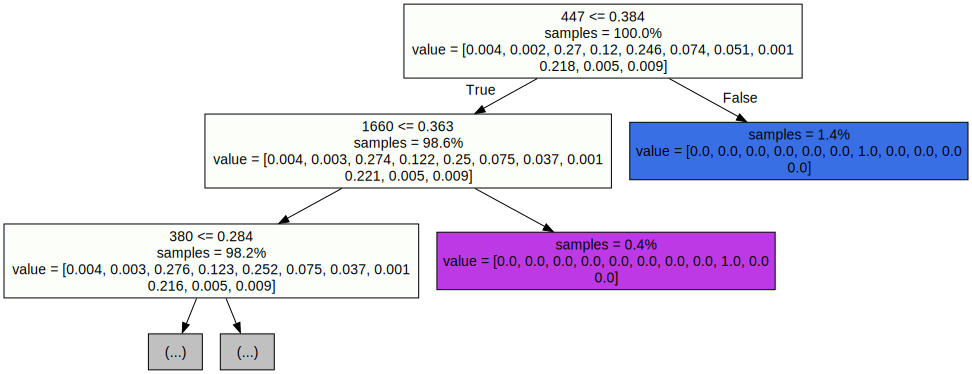

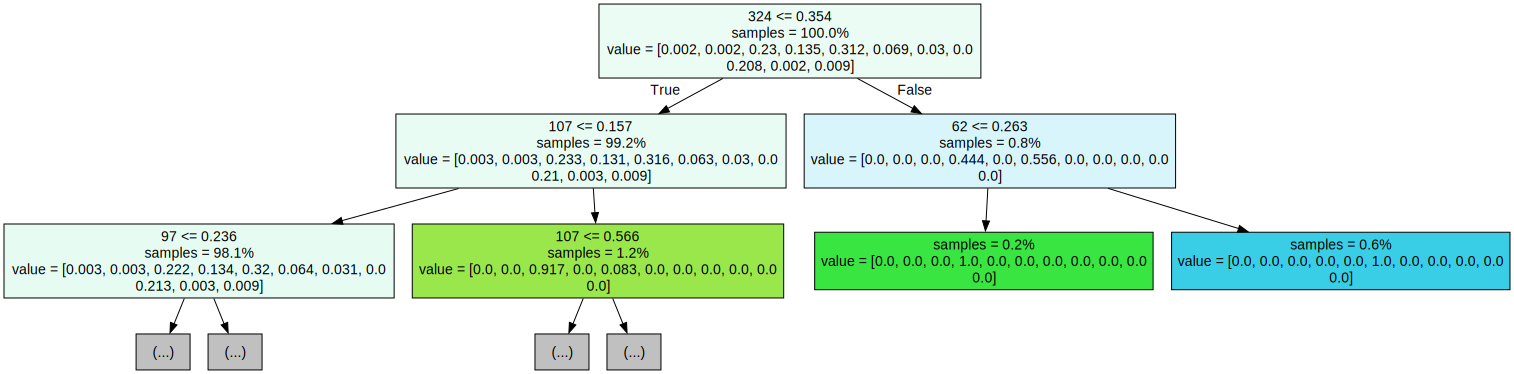

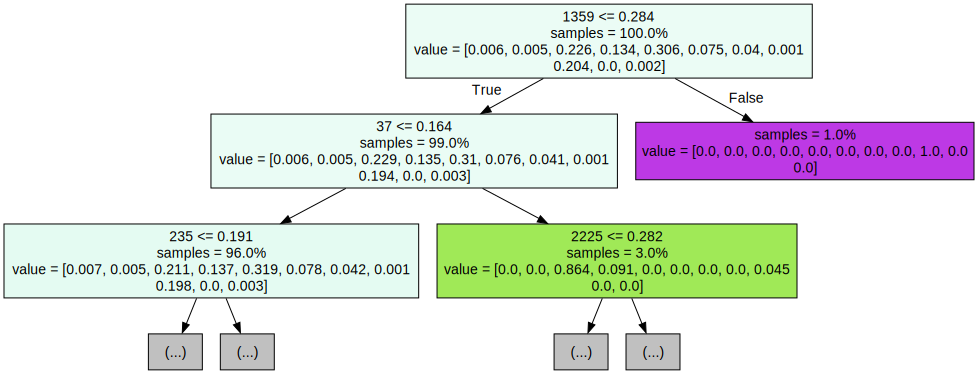

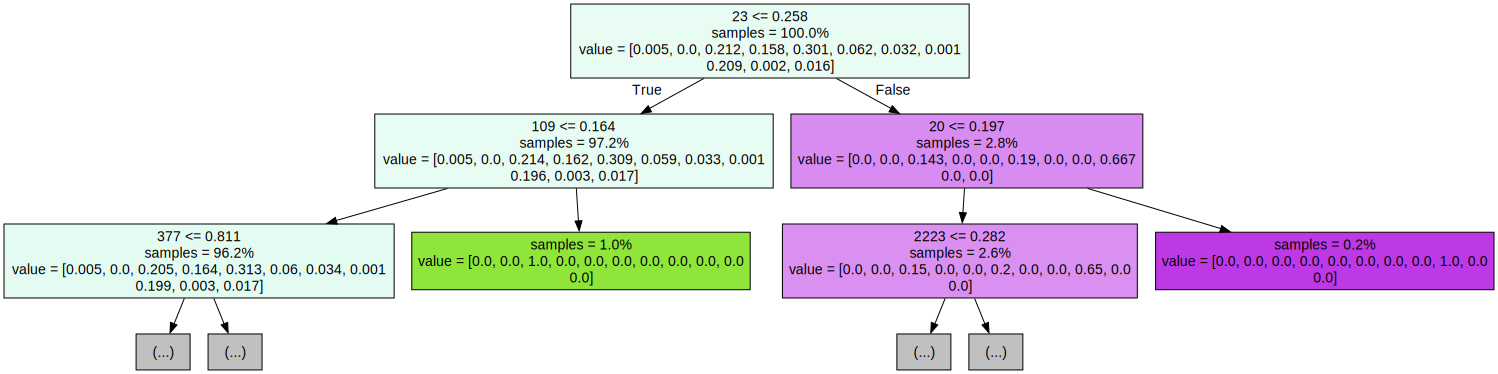

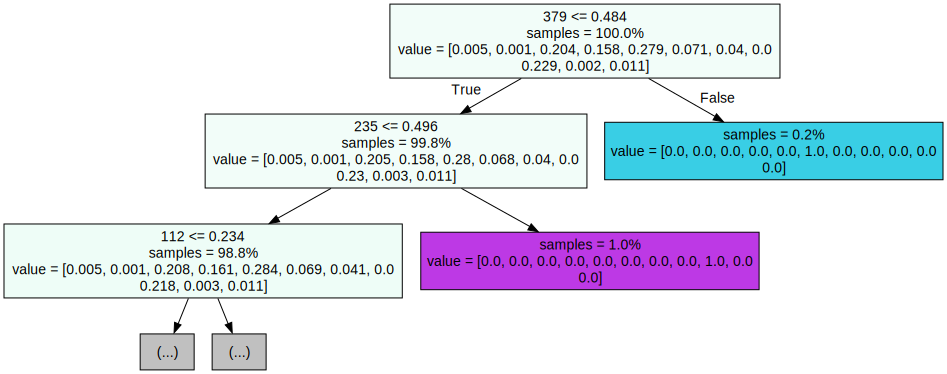

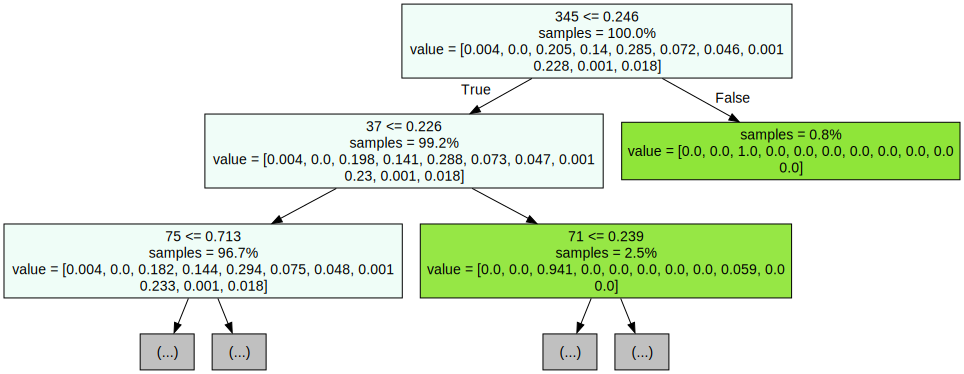

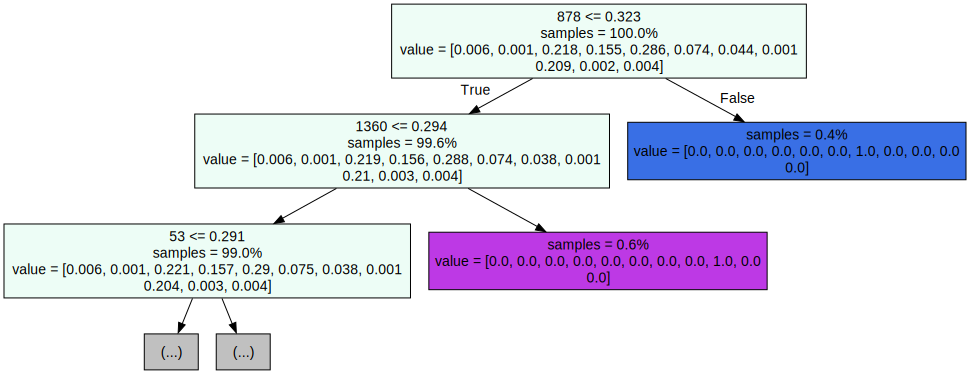

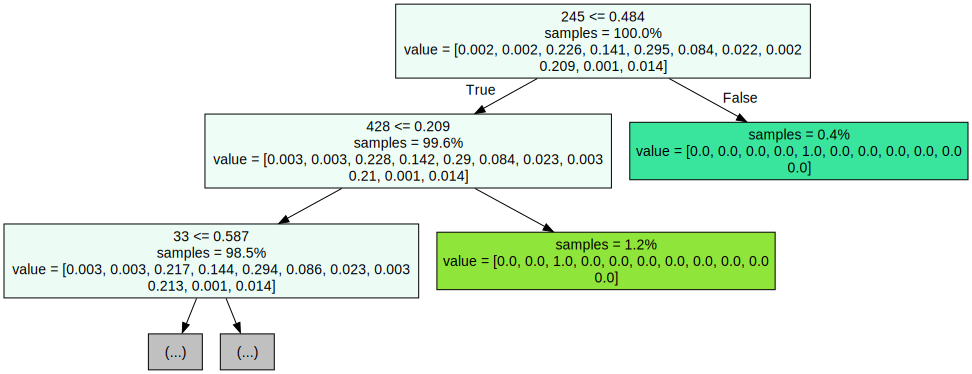

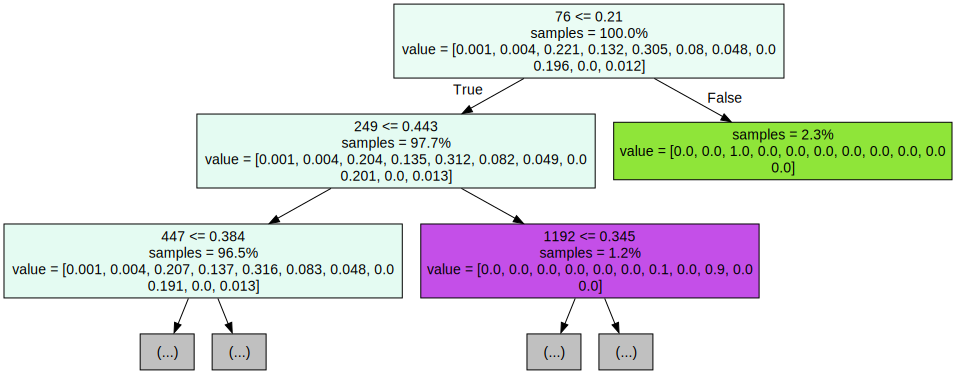

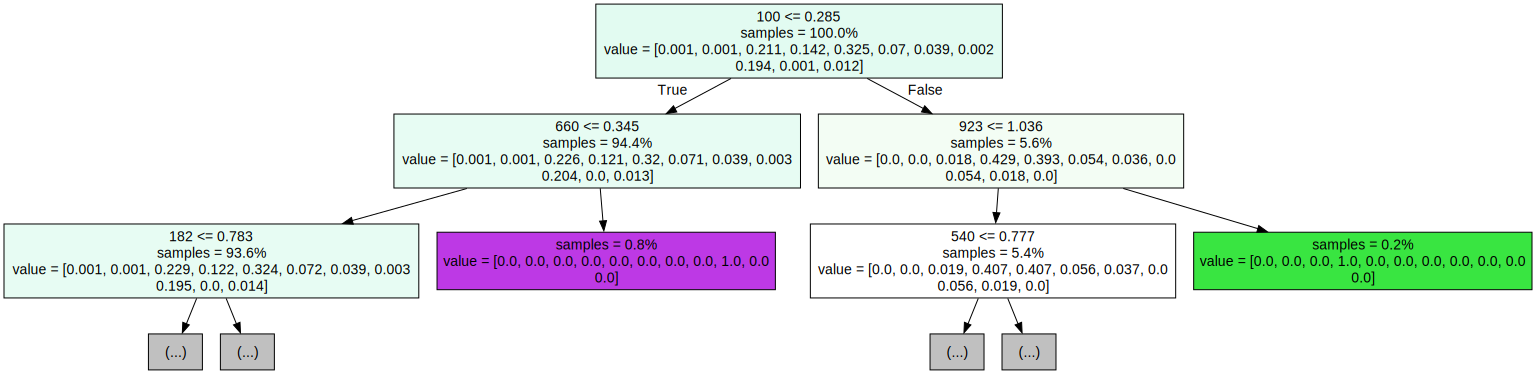

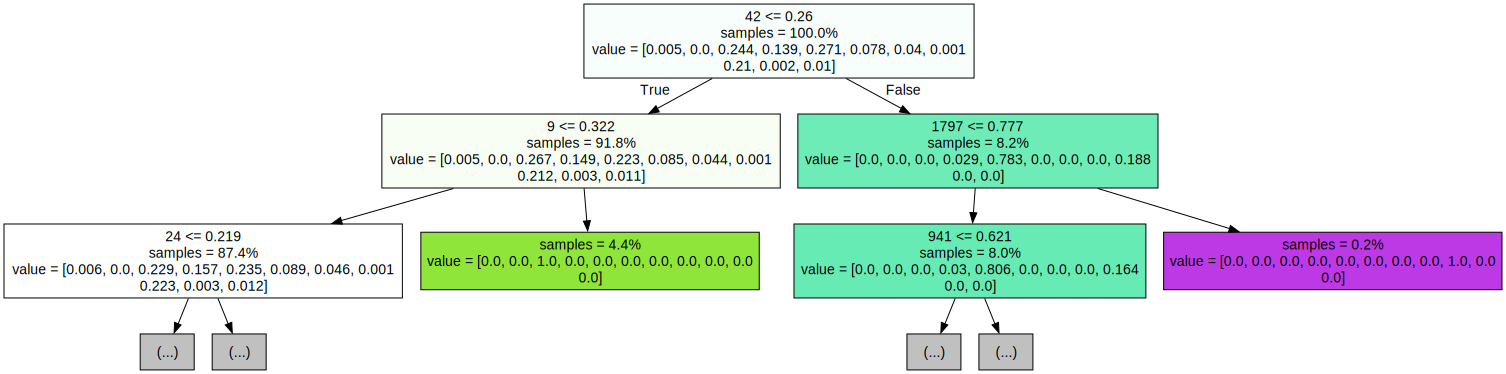

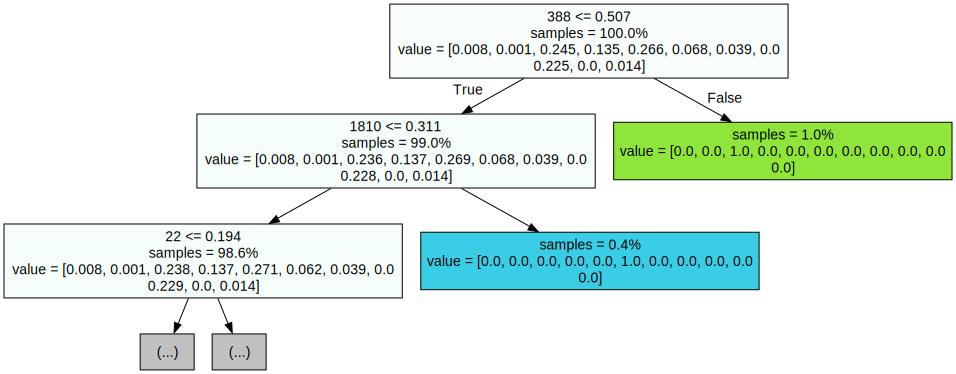

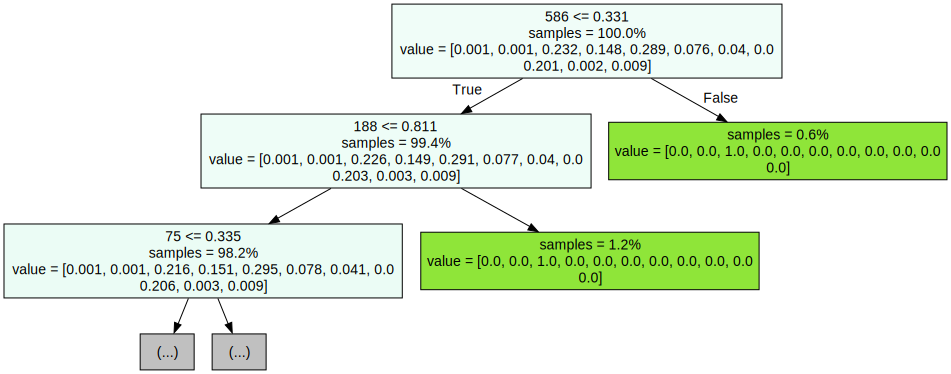

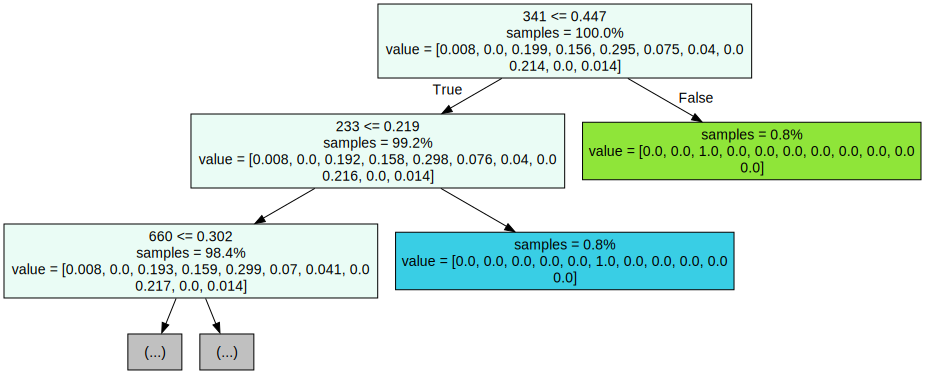

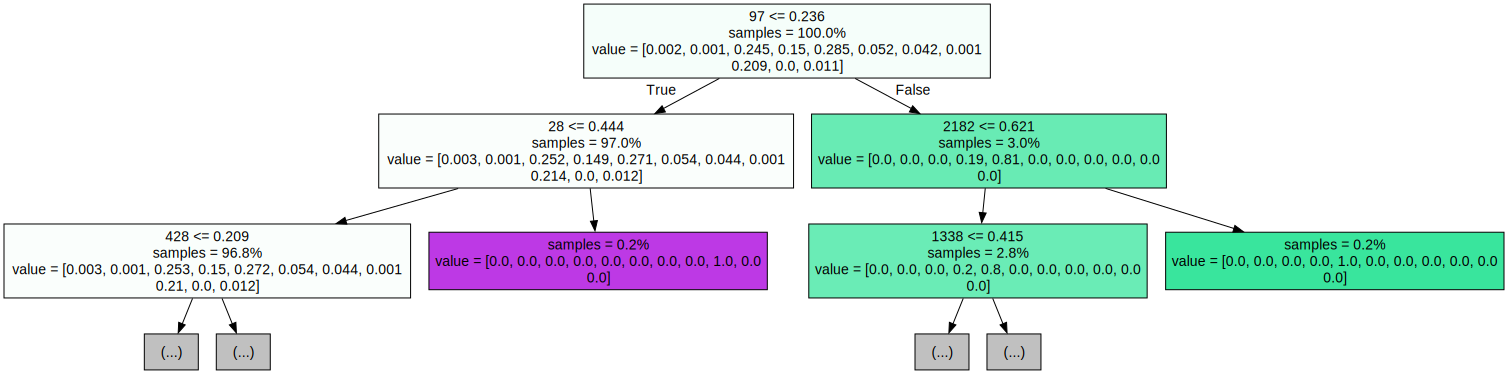

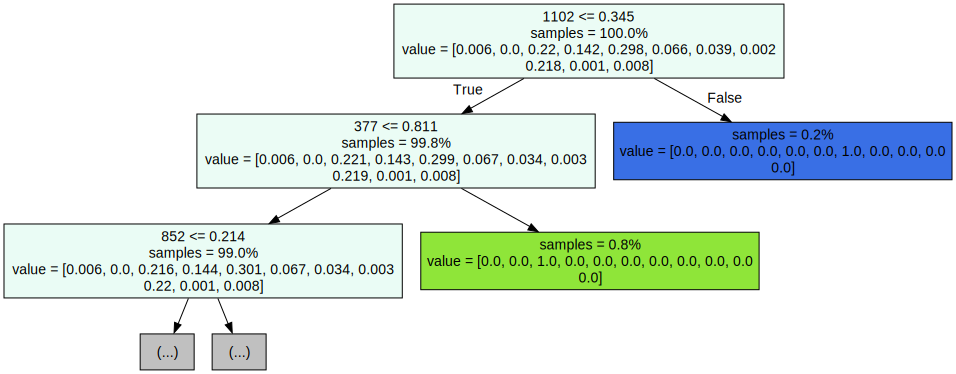

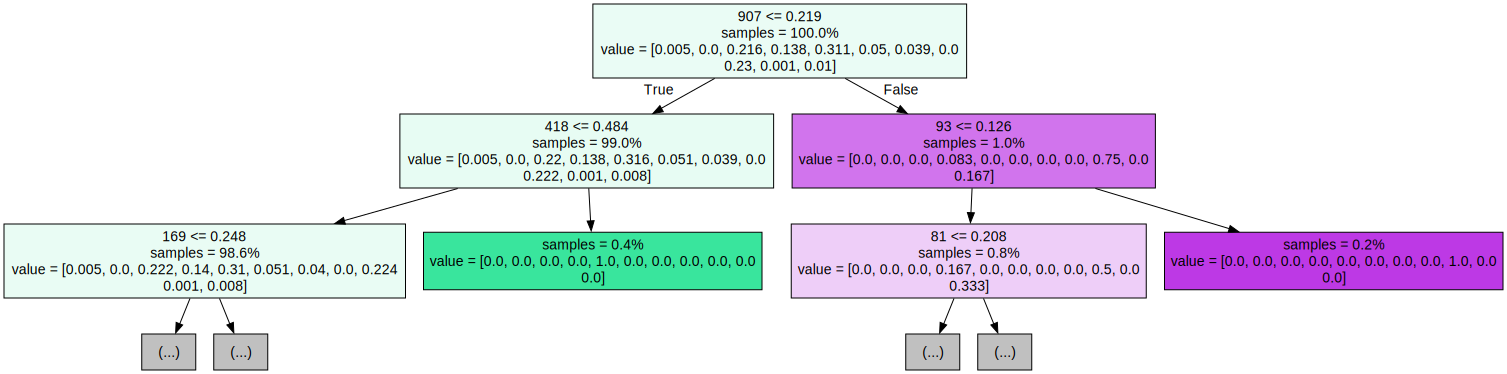

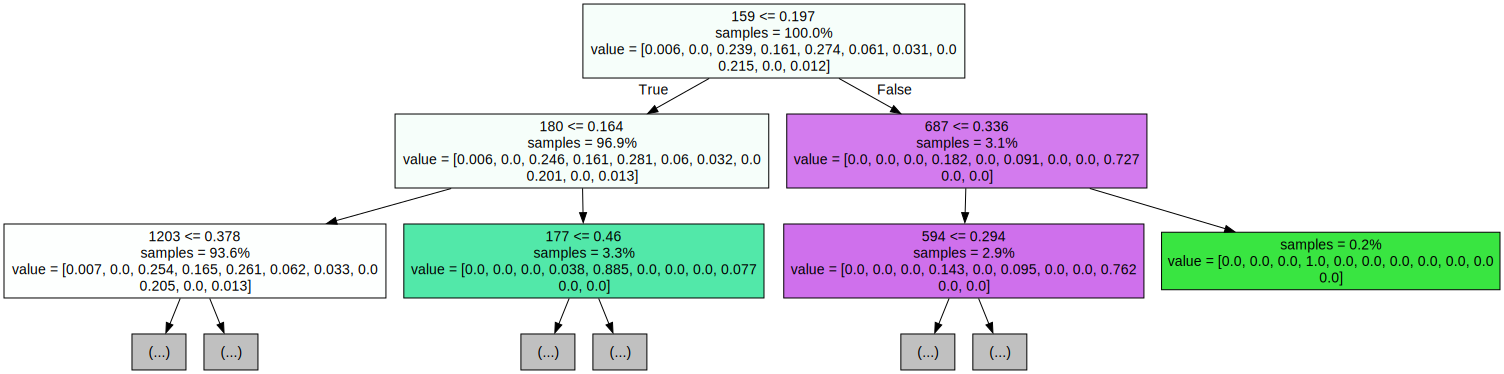

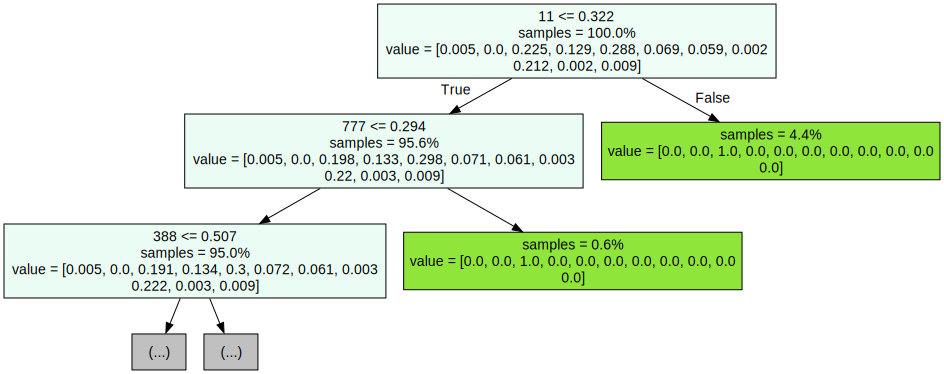

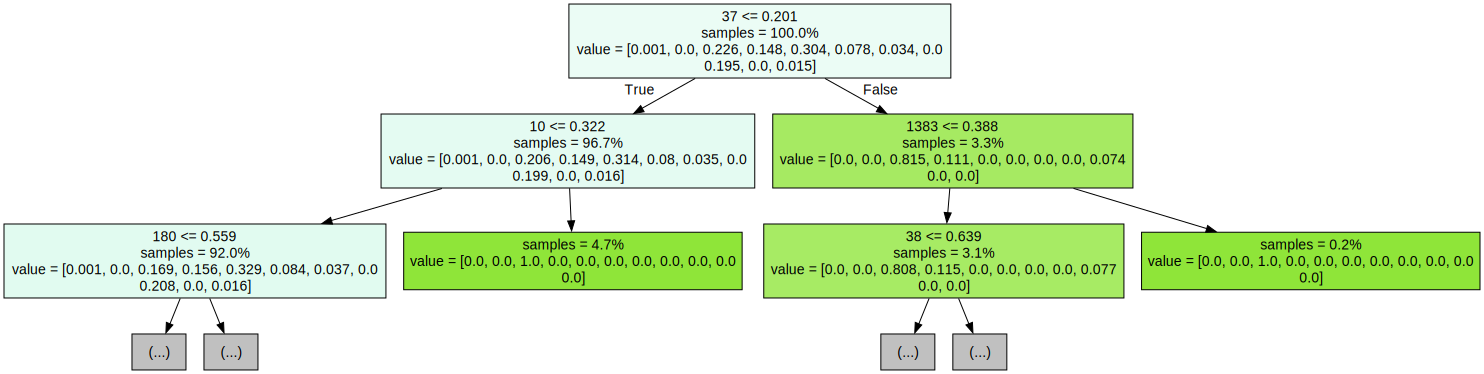

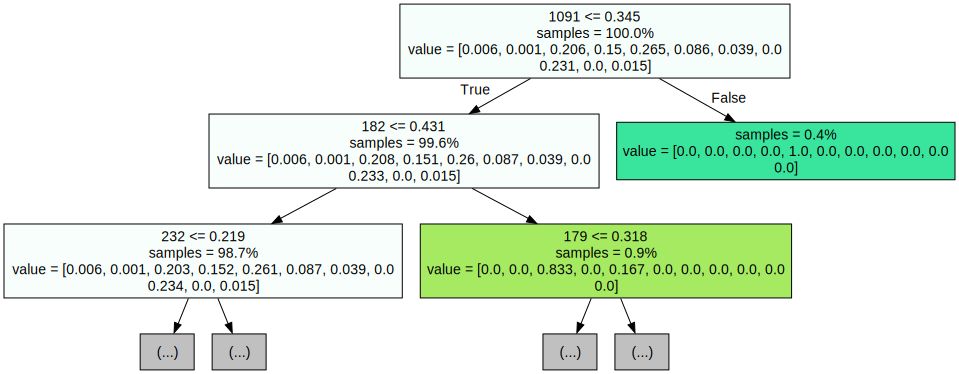

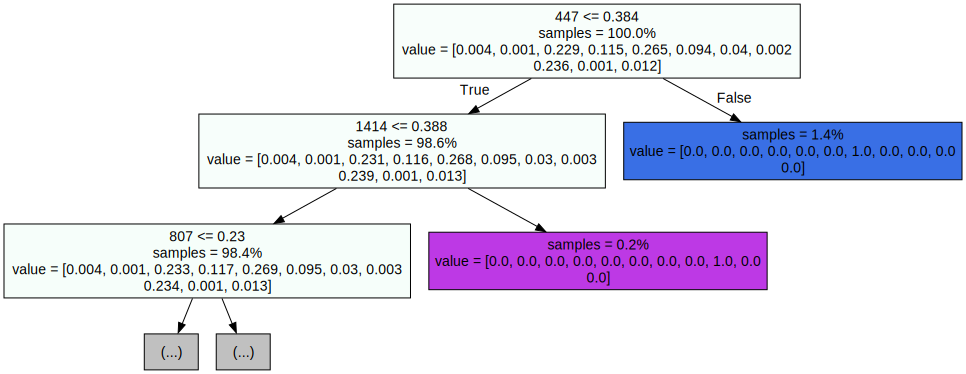

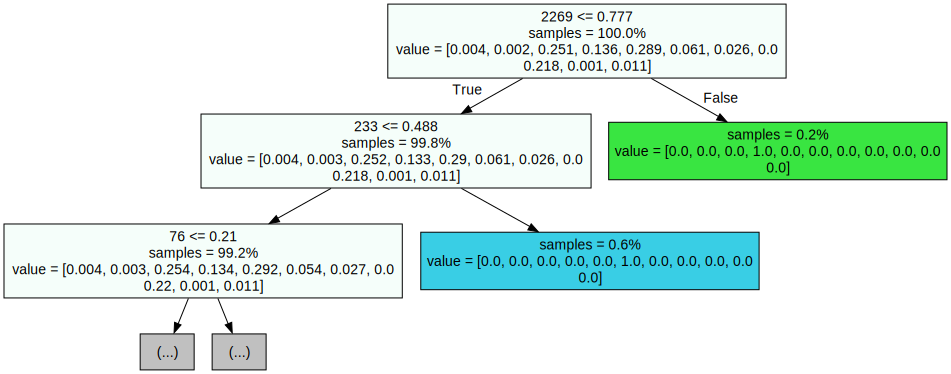

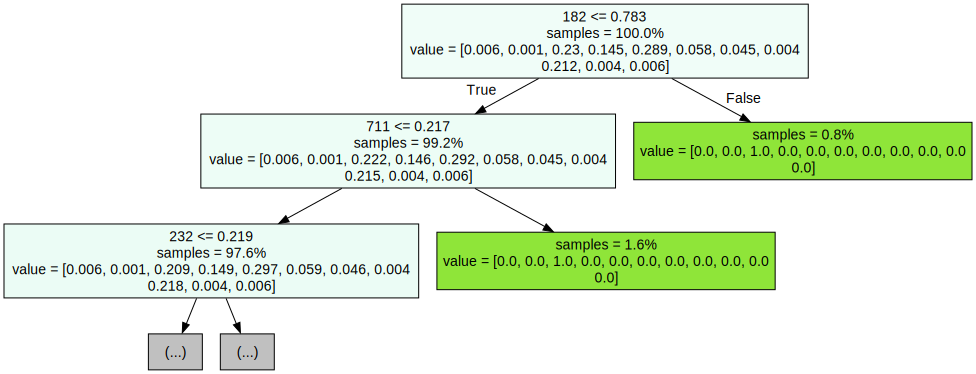

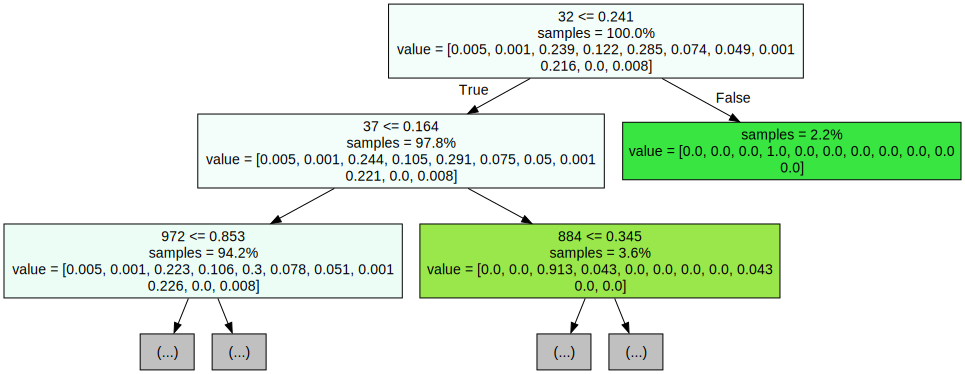

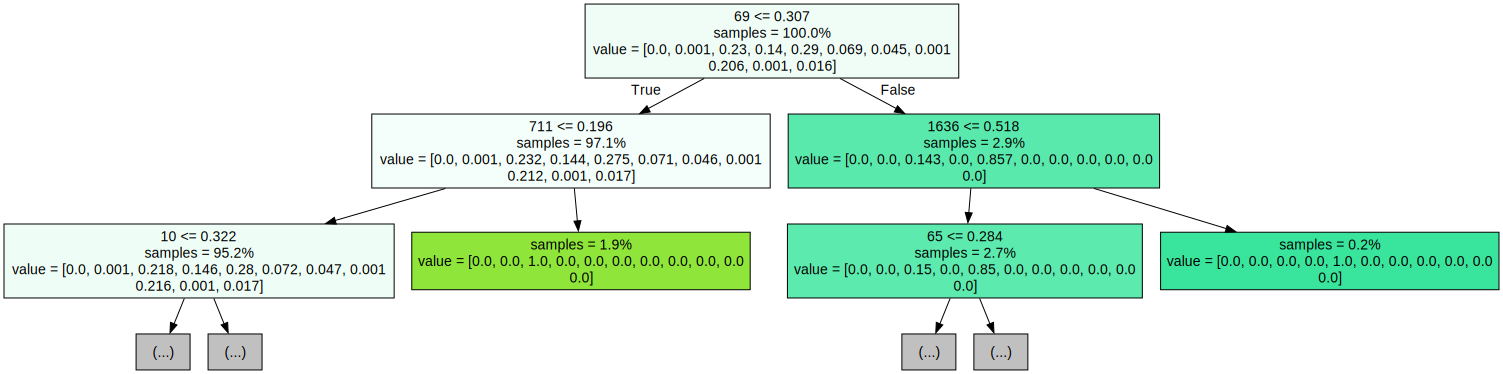

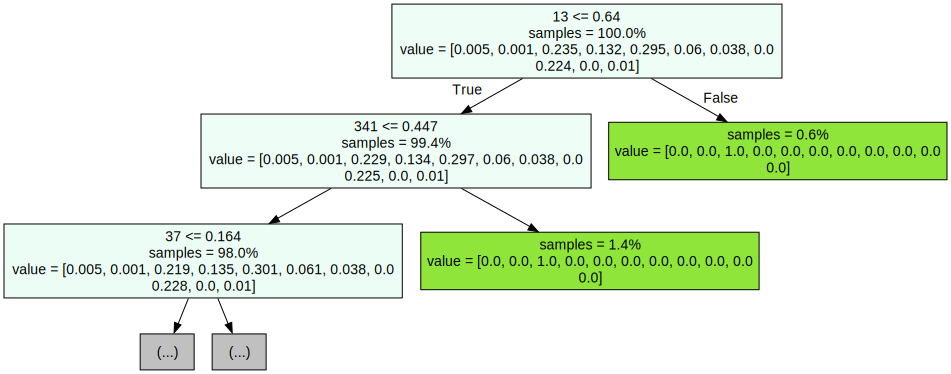

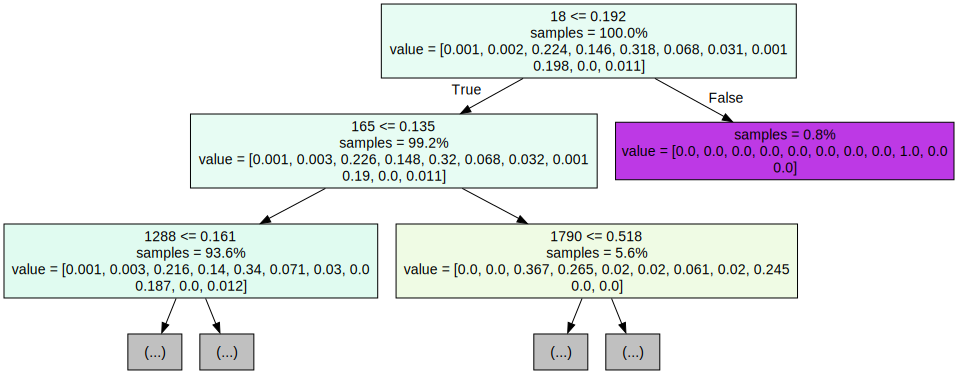

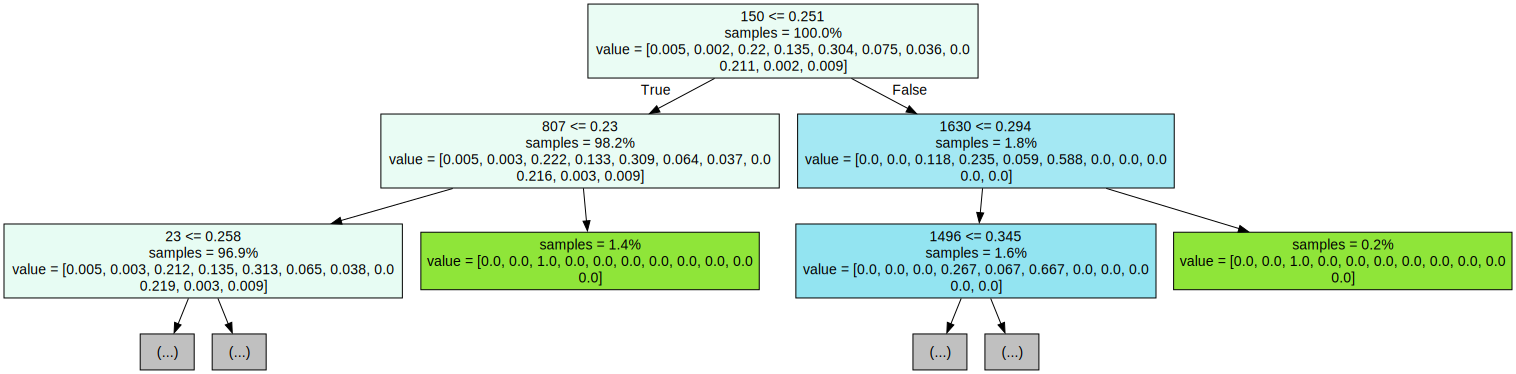

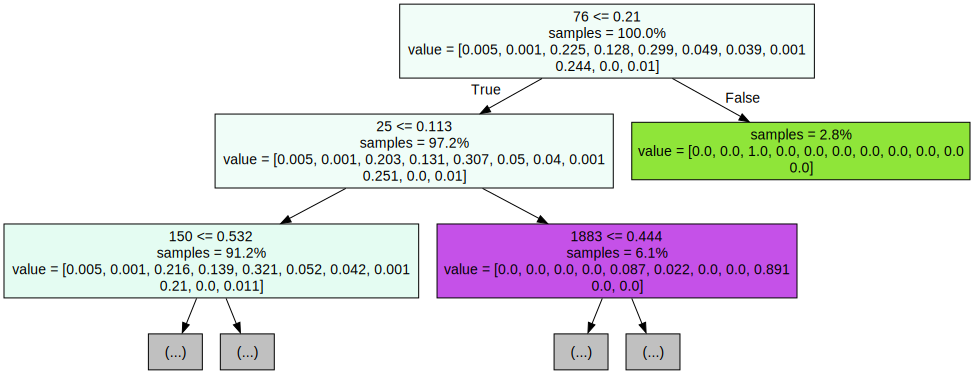

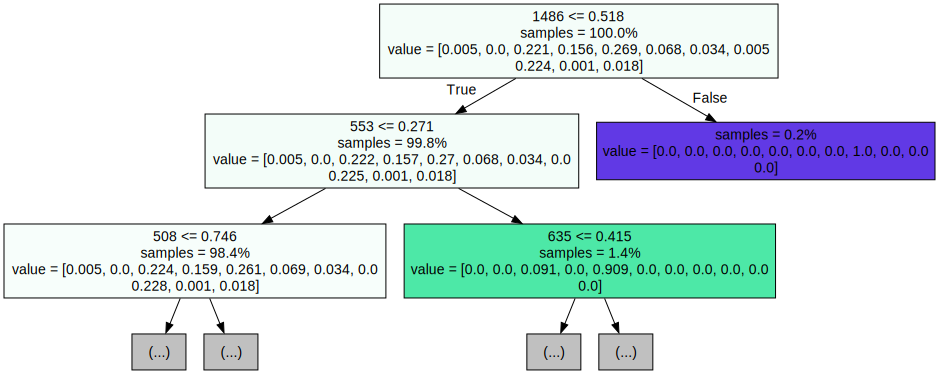

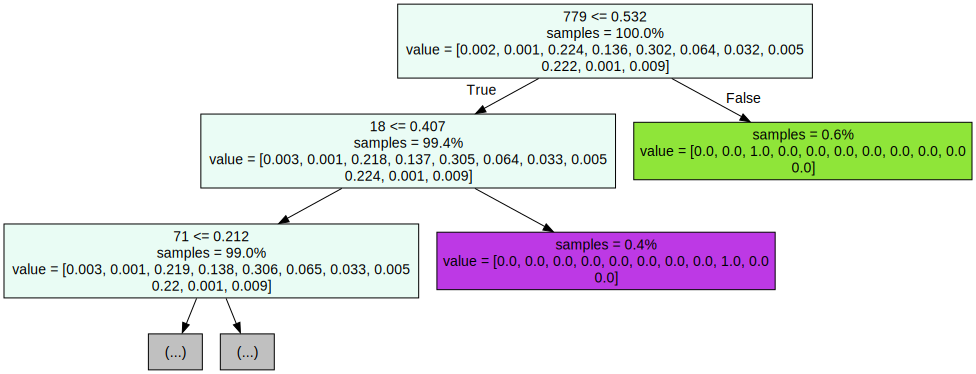

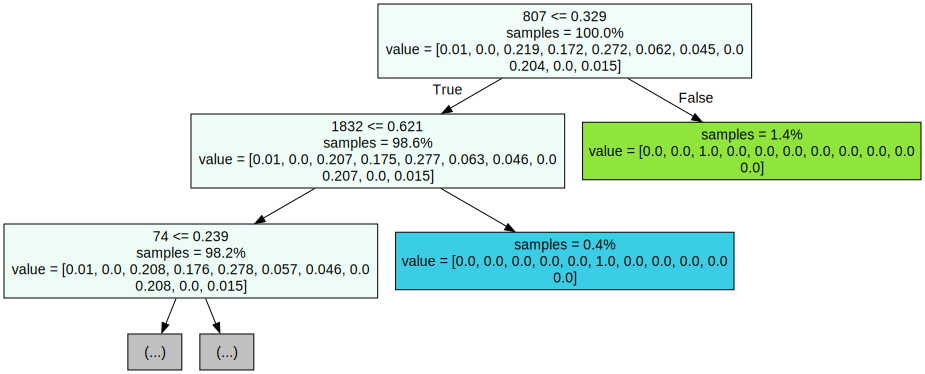

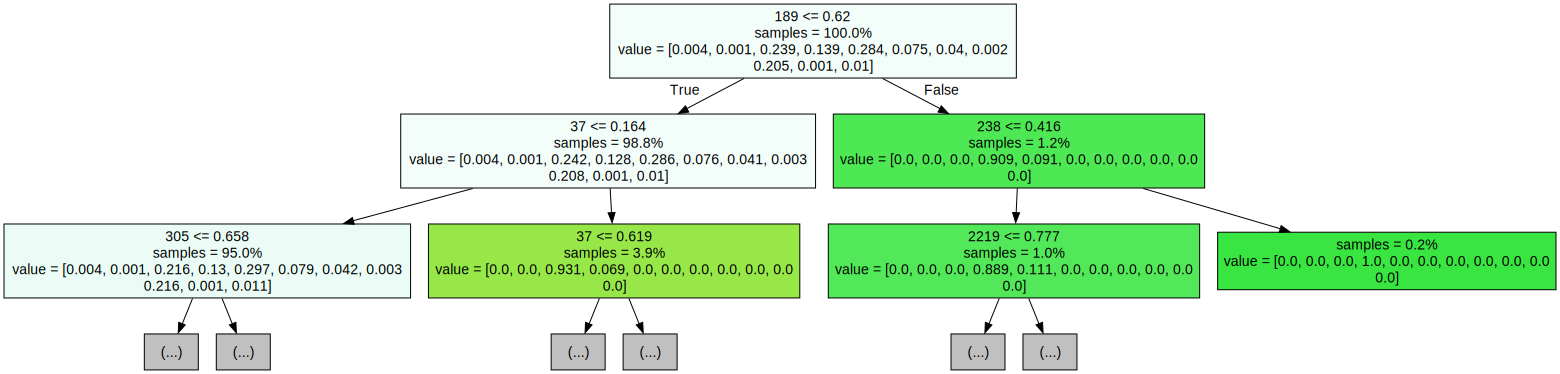

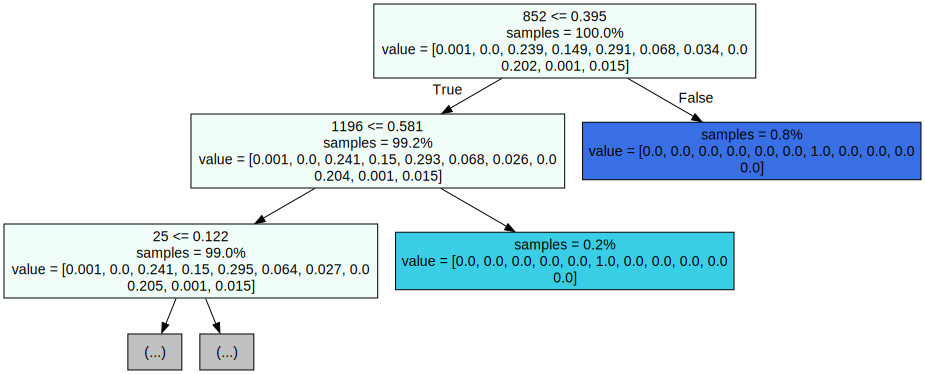

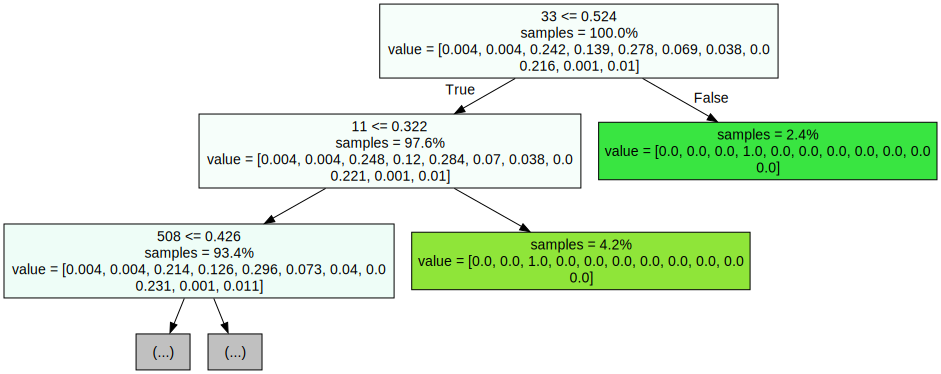

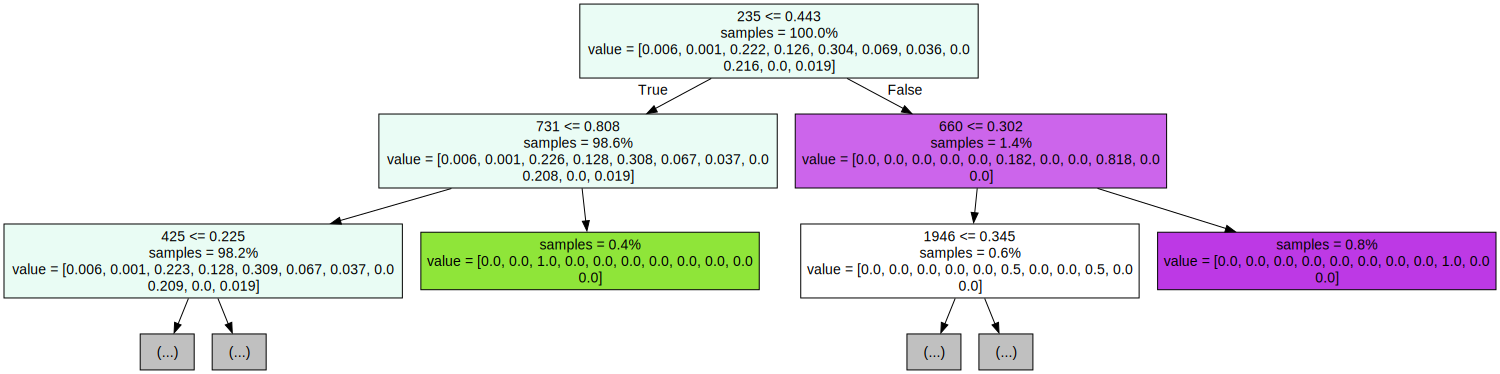

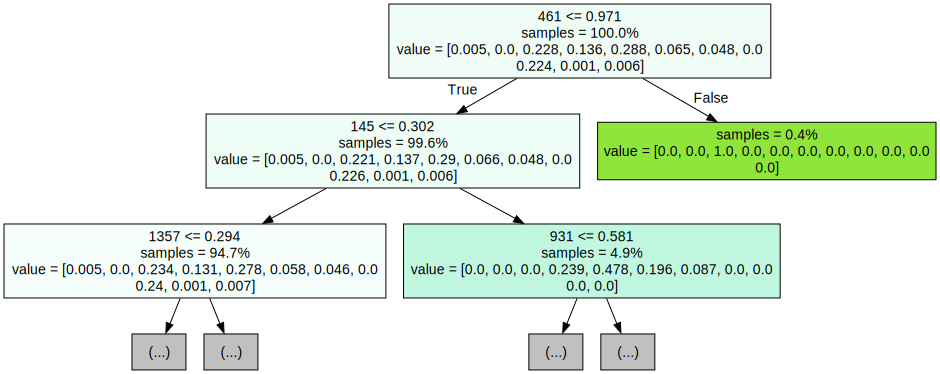

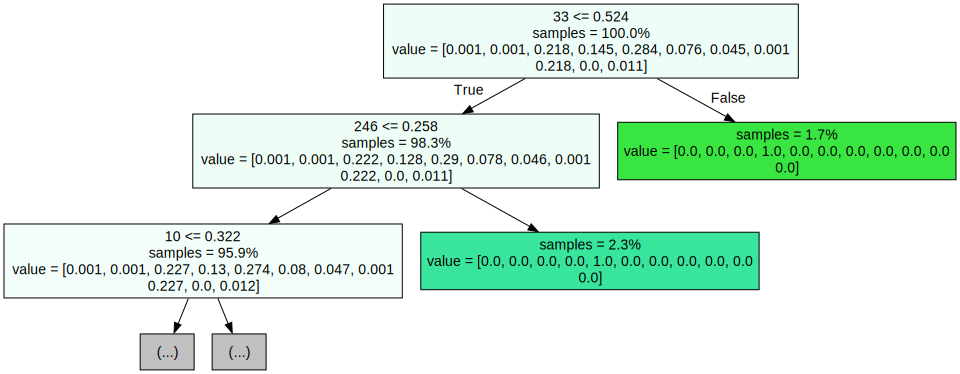

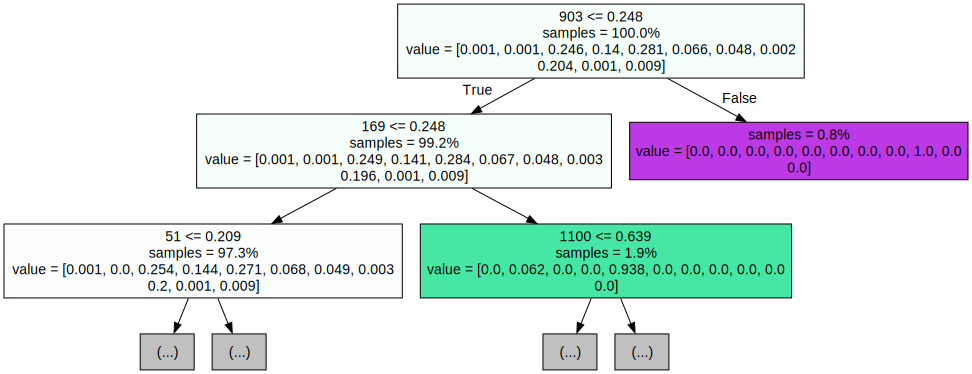

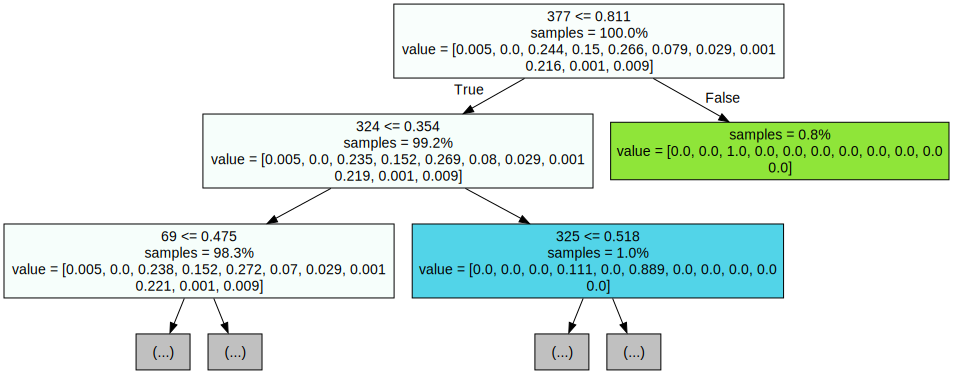

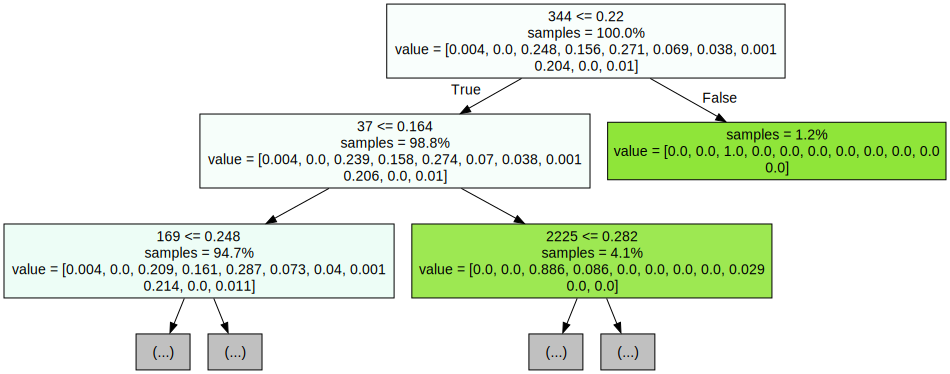

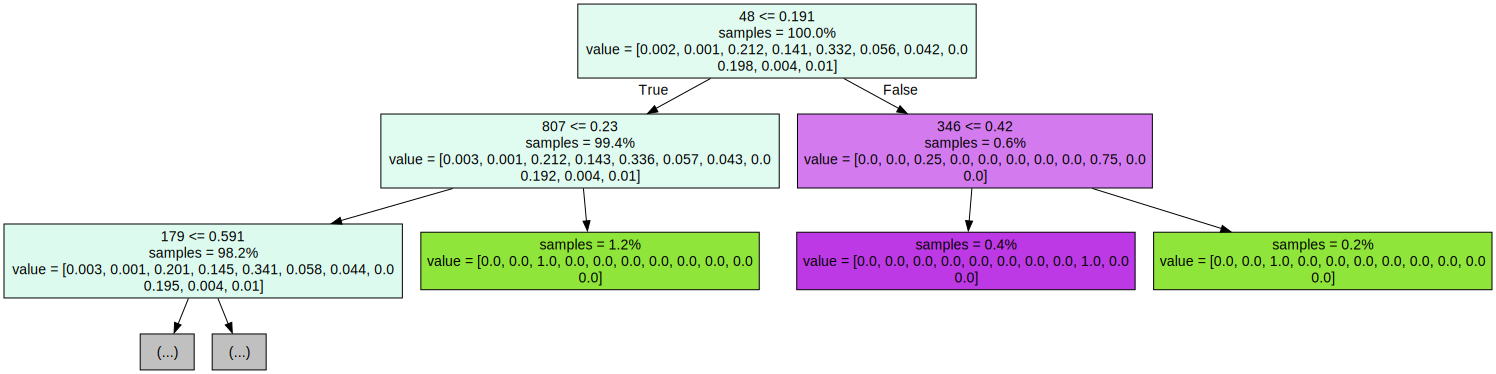

In [63]:
for i in range(100):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [64]:
#Mostramos las matrices de confusion tanto de test como de train para ver los resultados encontrados

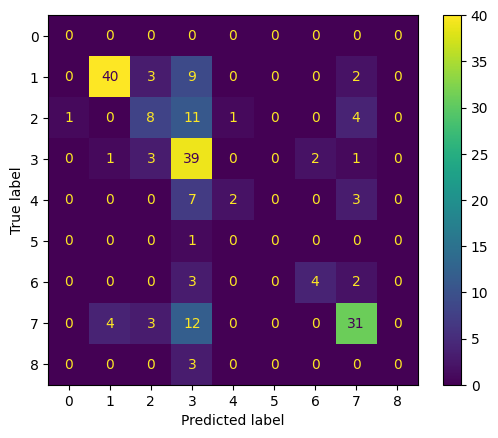

In [65]:
y_predict = rf.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             )
disp.plot()

In [66]:
#Imprimimos por ultimo los resultados de las metricas

In [67]:
print(metrics.classification_report(y_test,y_predict, digits = 4))

                      precision    recall  f1-score   support

Ciencia y Tecnología     0.0000    0.0000    0.0000         0
            Deportes     0.8889    0.7407    0.8081        54
           Educación     0.4706    0.3200    0.3810        25
     Entretenimiento     0.4588    0.8478    0.5954        46
       Gente y Blogs     0.6667    0.1667    0.2667        12
 Mascotas y Animales     0.0000    0.0000    0.0000         1
              Música     0.6667    0.4444    0.5333         9
Película y Animación     0.7209    0.6200    0.6667        50
    Viajes y Eventos     0.0000    0.0000    0.0000         3

            accuracy                         0.6200       200
           macro avg     0.4303    0.3489    0.3612       200
        weighted avg     0.6546    0.6200    0.6094       200



C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [61]:
#Concluyendo podemos ver como la regresion logistica es el mejor modelo en este caso con un porcentaje de accuracy del 0.67 o 67%
#Seguido por el Random forest que nos muestra una accuracy de entre 0.62 y 0.63 o 62% y 63%, y como ultimo tenemos al GBM 
#con un porcentaje de 0.60 o 60%